In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Load dataset
# Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/space-missions
file_path = '/content/drive/MyDrive/MSIS/SEM 3/INFSCI 2415 - Information Visualization/Finals/space_missions.csv'
space_missions_df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
space_missions_df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,State
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",04-10-1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,Kazakhstan,NaN
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",03-11-1957,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,Kazakhstan,NaN
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",06-12-1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,USA,Florida
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",01-02-1958,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,USA,Florida
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",05-02-1958,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,USA,Florida


# Data Preprocessing

In [ ]:
# Convert 'Date' to datetime format
space_missions_df['Date'] = pd.to_datetime(space_missions_df['Date'], errors='coerce')

# Convert 'Price' to numeric
space_missions_df['Price'] = pd.to_numeric(space_missions_df['Price'], errors='coerce')

# Fill missing 'State' values with 'Unknown'
space_missions_df['State'] = space_missions_df['State'].fillna('Unknown')

# Visualization Styling

In [ ]:
# Set a consistent visualization style
plt.style.use('ggplot')
sns.set_palette("viridis", desat=0.8)

# Visualization 1: Mission Cost Distribution by Company (Box Plot)

<ipython-input-6-27ce049a2b5b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


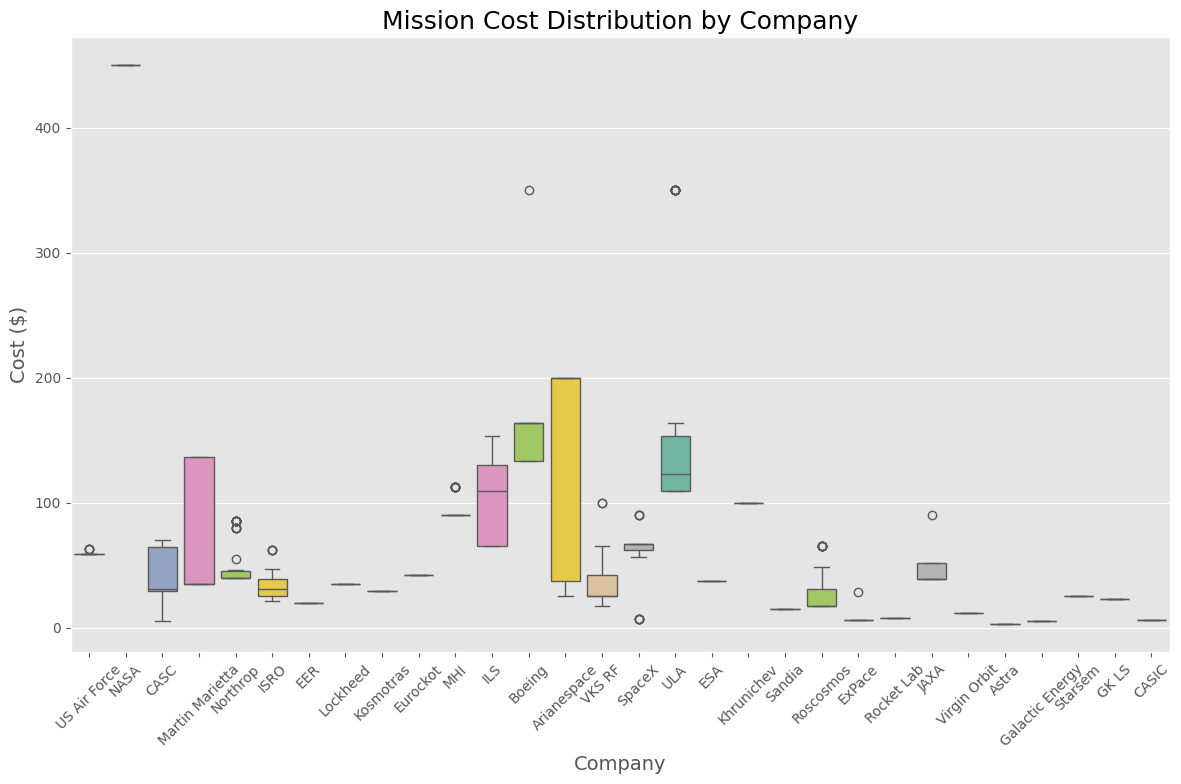

In [ ]:
plt.figure(figsize=(12, 8))  # Set a consistent figure size
plt.rcParams.update({
    'font.size': 12,  # General font size
    'axes.titlesize': 18,  # Title font size
    'axes.labelsize': 14,  # Axis label font size
    'xtick.labelsize': 10,  # X-axis tick label font size
    'ytick.labelsize': 10   # Y-axis tick label font size
})
plt.gca().set_aspect('auto', adjustable='box')

#plt.figure(figsize=(14, 8))
sns.boxplot(
    data=space_missions_df.dropna(subset=['Price']),
    x='Company',
    y='Price',
    palette="Set2"
)
plt.title("Mission Cost Distribution by Company", fontsize=18)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Cost ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Number of Missions per Country (Bar Plot)

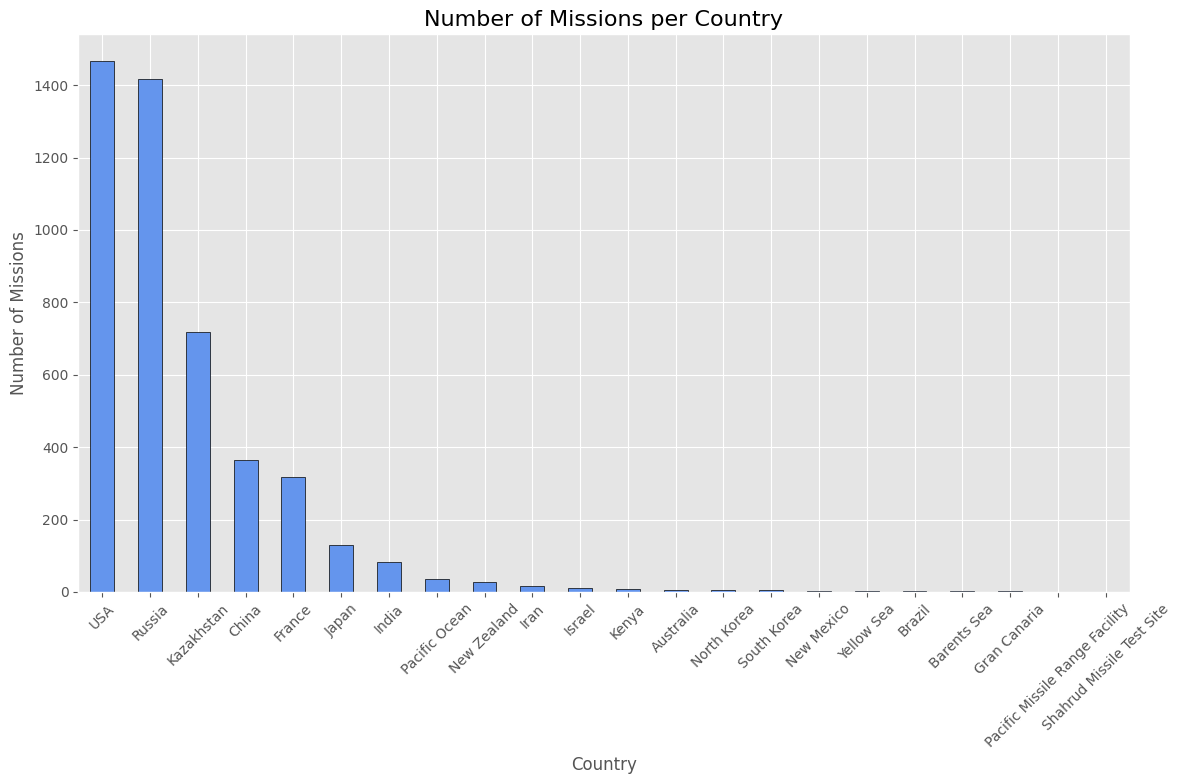

In [ ]:
missions_per_country = space_missions_df['Country'].value_counts()

#plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 8))  # Set a consistent figure size
plt.rcParams.update({
    'font.size': 12,  # General font size
    'axes.titlesize': 18,  # Title font size
    'axes.labelsize': 14,  # Axis label font size
    'xtick.labelsize': 10,  # X-axis tick label font size
    'ytick.labelsize': 10   # Y-axis tick label font size
})
plt.gca().set_aspect('auto', adjustable='box')

missions_per_country.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Number of Missions per Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Missions", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Success vs. Failure Rates Over Time (Area Plot)

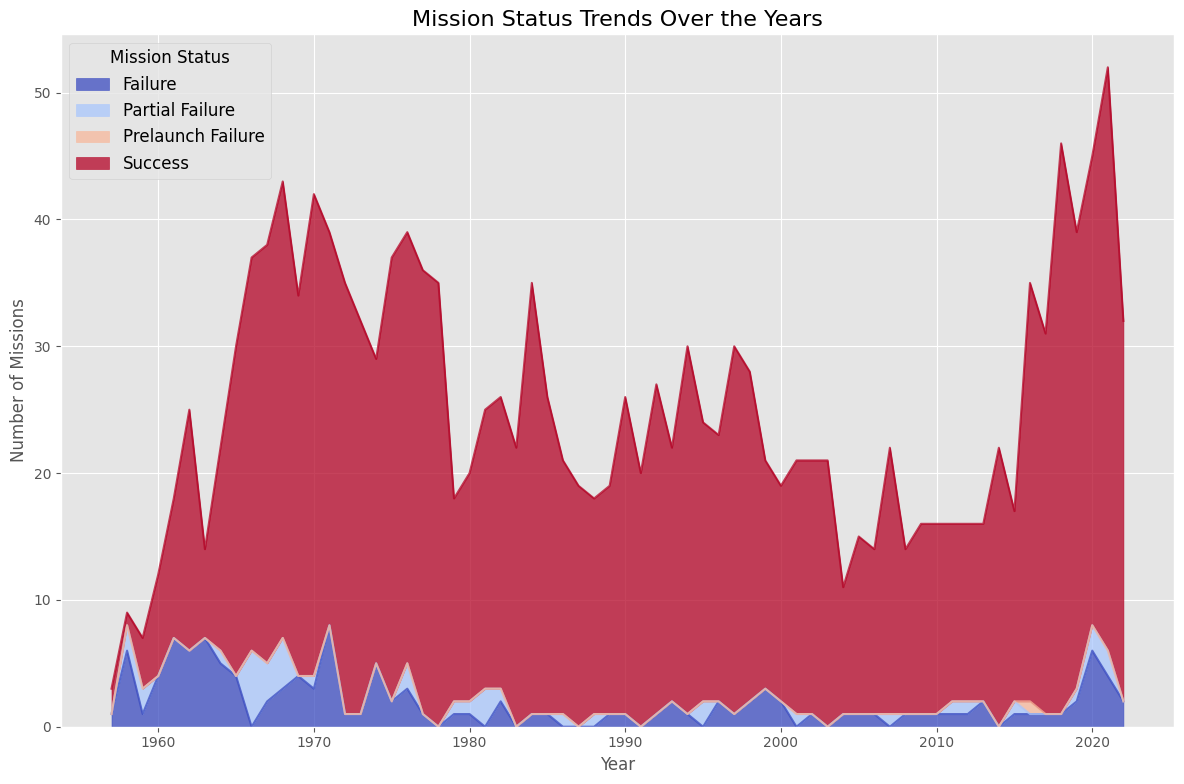

In [ ]:
missions_over_time = space_missions_df.groupby([space_missions_df['Date'].dt.year, 'MissionStatus']).size().unstack(fill_value=0)
missions_over_time.plot(kind='area', figsize=(12, 8), alpha=0.75, colormap="coolwarm")

plt.title("Mission Status Trends Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Missions", fontsize=12)
plt.legend(title="Mission Status")
plt.tight_layout()
plt.show()

# Visualization 4: Distribution of Launch States in the USA (Bar Plot)

<ipython-input-9-a99ac2613803>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usa_states.values, y=usa_states.index, palette="rocket")


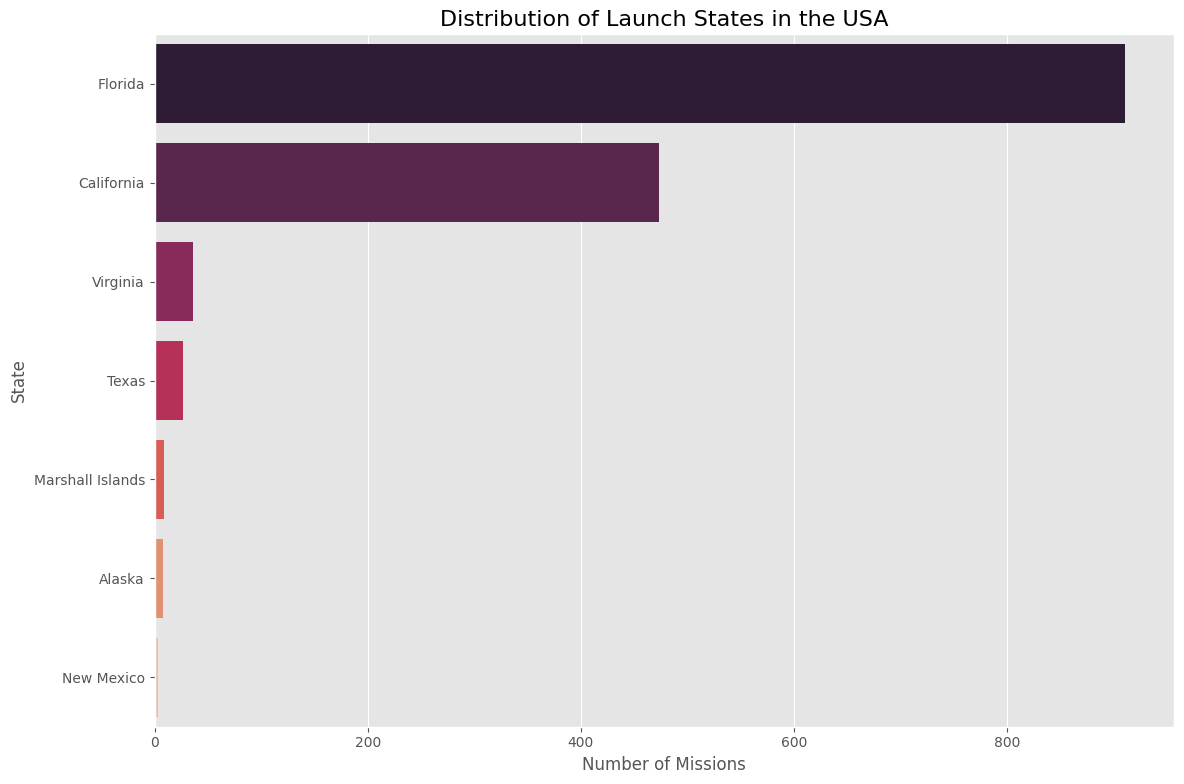

In [ ]:
usa_states = space_missions_df[space_missions_df['Country'] == 'USA']['State'].value_counts()

#plt.figure(figsize=(10, 6))

plt.figure(figsize=(12, 8))  # Set a consistent figure size
plt.rcParams.update({
    'font.size': 12,  # General font size
    'axes.titlesize': 18,  # Title font size
    'axes.labelsize': 14,  # Axis label font size
    'xtick.labelsize': 10,  # X-axis tick label font size
    'ytick.labelsize': 10   # Y-axis tick label font size
})
plt.gca().set_aspect('auto', adjustable='box')

sns.barplot(x=usa_states.values, y=usa_states.index, palette="rocket")
plt.title("Distribution of Launch States in the USA", fontsize=16)
plt.xlabel("Number of Missions", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 5: Mission Success Rates by Company (Stacked Bar Plot)

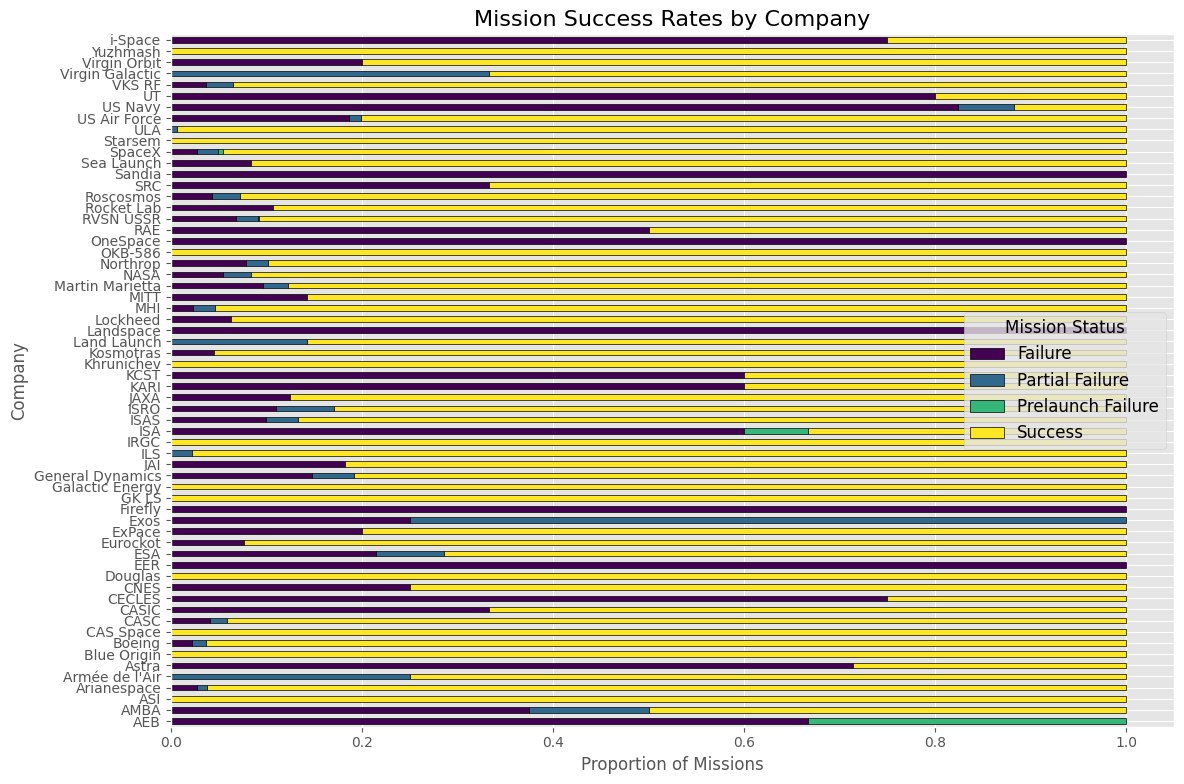

In [ ]:
mission_status_by_company = space_missions_df.groupby(['Company', 'MissionStatus']).size().unstack(fill_value=0)
mission_status_by_company_percentage = mission_status_by_company.div(mission_status_by_company.sum(axis=1), axis=0)

mission_status_by_company_percentage.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title("Mission Success Rates by Company", fontsize=16)
plt.xlabel("Proportion of Missions", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.legend(title="Mission Status")
plt.tight_layout()
plt.show()

# Visualization 6: Rocket Status Distribution (Pie Chart)

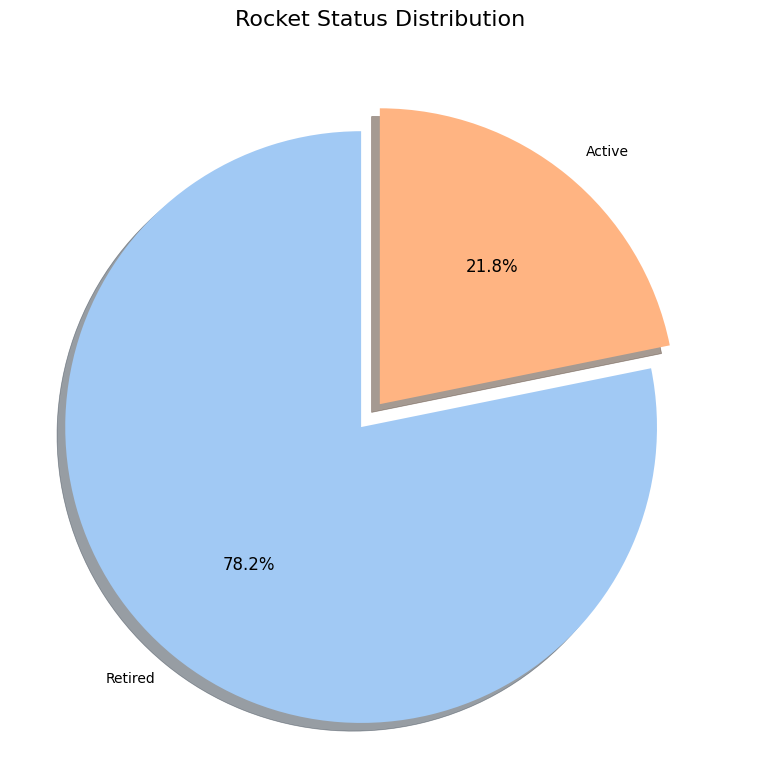

In [ ]:
rocket_status_counts = space_missions_df['RocketStatus'].value_counts()

plt.figure(figsize=(12, 8))
rocket_status_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    explode=[0.1 if i == 0 else 0 for i in range(len(rocket_status_counts))],
    shadow=True
)
plt.title("Rocket Status Distribution", fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization 7: Timeline of Missions by Rocket Status (Line Plot)

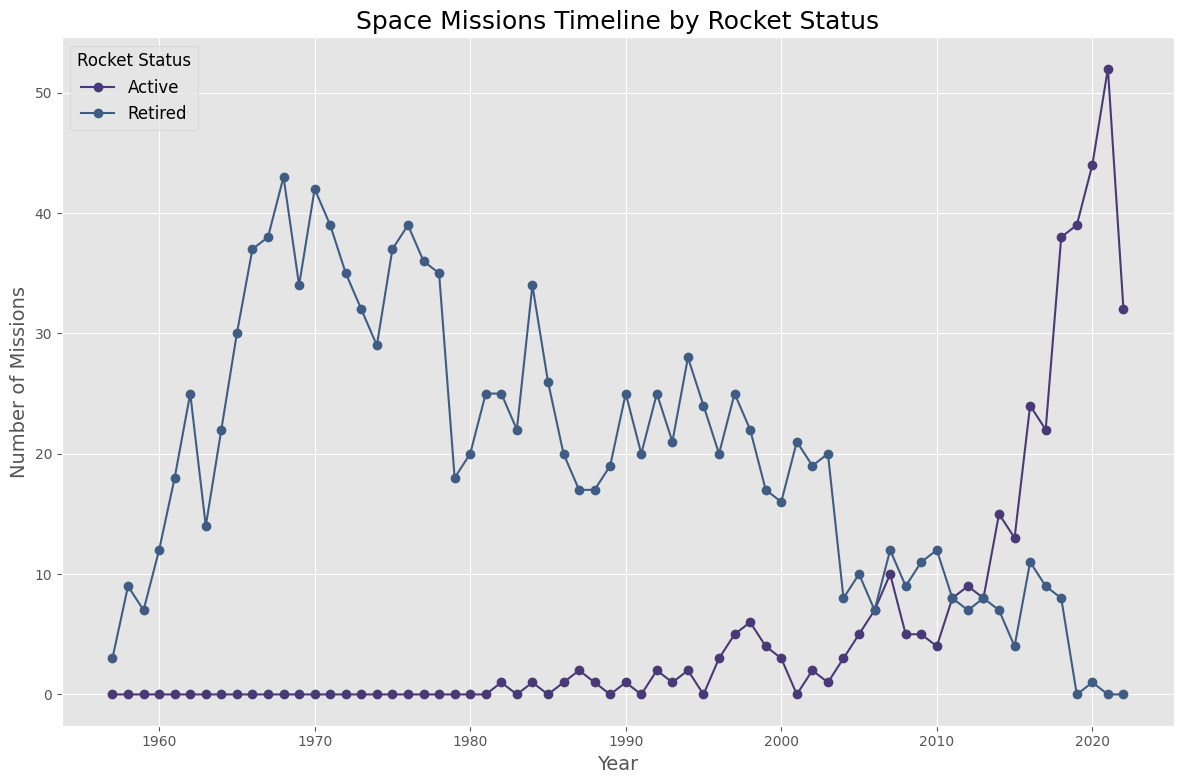

In [ ]:
timeline_data = space_missions_df.groupby([space_missions_df['Date'].dt.year, 'RocketStatus']).size().unstack(fill_value=0)

timeline_data.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Space Missions Timeline by Rocket Status', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.legend(title='Rocket Status', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 8: Top Launch Locations Heatmap (Bar Plot)

<ipython-input-13-678876c805bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette="viridis")


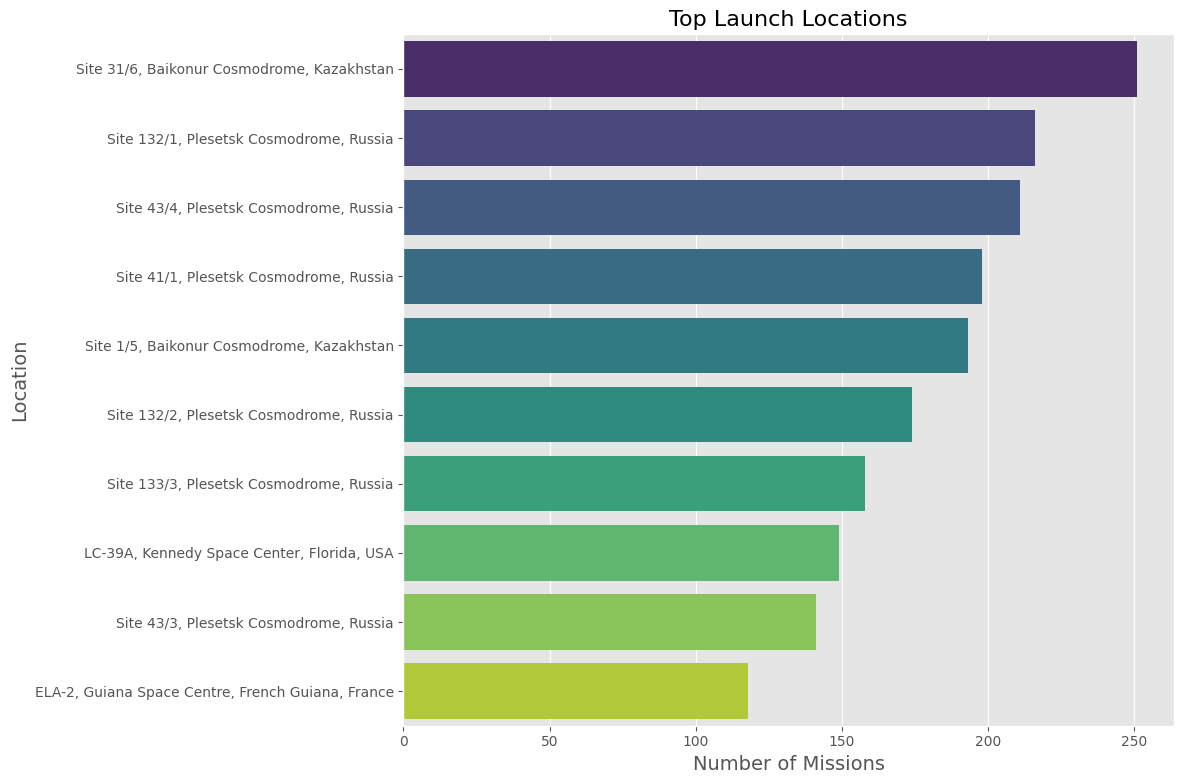

In [ ]:
top_locations = space_missions_df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_locations.index, x=top_locations.values, palette="viridis")
plt.title("Top Launch Locations", fontsize=16)
plt.xlabel("Number of Missions", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 9: Interactive Country-Wise Mission Success (Choropleth Map)

In [ ]:
country_mission_stats = space_missions_df.groupby(['Country', 'MissionStatus']).size().unstack(fill_value=0)
country_mission_stats['Success Rate'] = country_mission_stats['Success'] / country_mission_stats.sum(axis=1)

fig = px.choropleth(
    country_mission_stats.reset_index(),
    locations="Country",
    locationmode="country names",
    color="Success Rate",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Mission Success Rates by Country",
)
fig.update_layout(
    width=1200,  # Set width to maintain size
    height=800,  # Set height to maintain size
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_font=dict(size=24)  # Set title font size
    #margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins for better fit
)
fig.show()

# Visualization 10: Sunburst Chart for Mission Details by Location (Interactive)

In [ ]:
fig = px.sunburst(
    space_missions_df,
    path=['Country', 'State', 'MissionStatus'],
    values=None,
    color="MissionStatus",
    title="Sunburst Chart of Mission Details by Location",
    color_discrete_map={
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "orange"
    }
)
fig.update_layout(width=1200,  # Set width to maintain size
                  height=800,  # Set height to maintain size
                  title_font=dict(size=24))
fig.show()

# Visualization 11: Countries Categorized by Number of Launches (Choropleth Map)

In [ ]:
country_mission_counts = space_missions_df['Country'].value_counts().reset_index()
country_mission_counts.columns = ['Country', 'Missions']
country_mission_counts['Tier'] = pd.cut(
    country_mission_counts['Missions'],
    bins=[0, 50, 200, 500, 1000],
    labels=['Low', 'Medium', 'High', 'Very High'],
    right=False
)

fig = px.choropleth(
    country_mission_counts,
    locations="Country",
    locationmode="country names",
    color="Tier",
    title="Countries Categorized by Number of Launches",
    color_discrete_sequence=px.colors.qualitative.Set3,
)
fig.update_geos(showframe=False, showcoastlines=True, projection_type="equirectangular")
fig.update_layout(title_font=dict(size=24), paper_bgcolor="#f4f4f2", width=1200,  height=800)
fig.show()

# Visualization 12: Number of Missions Over Time (Line Plot)

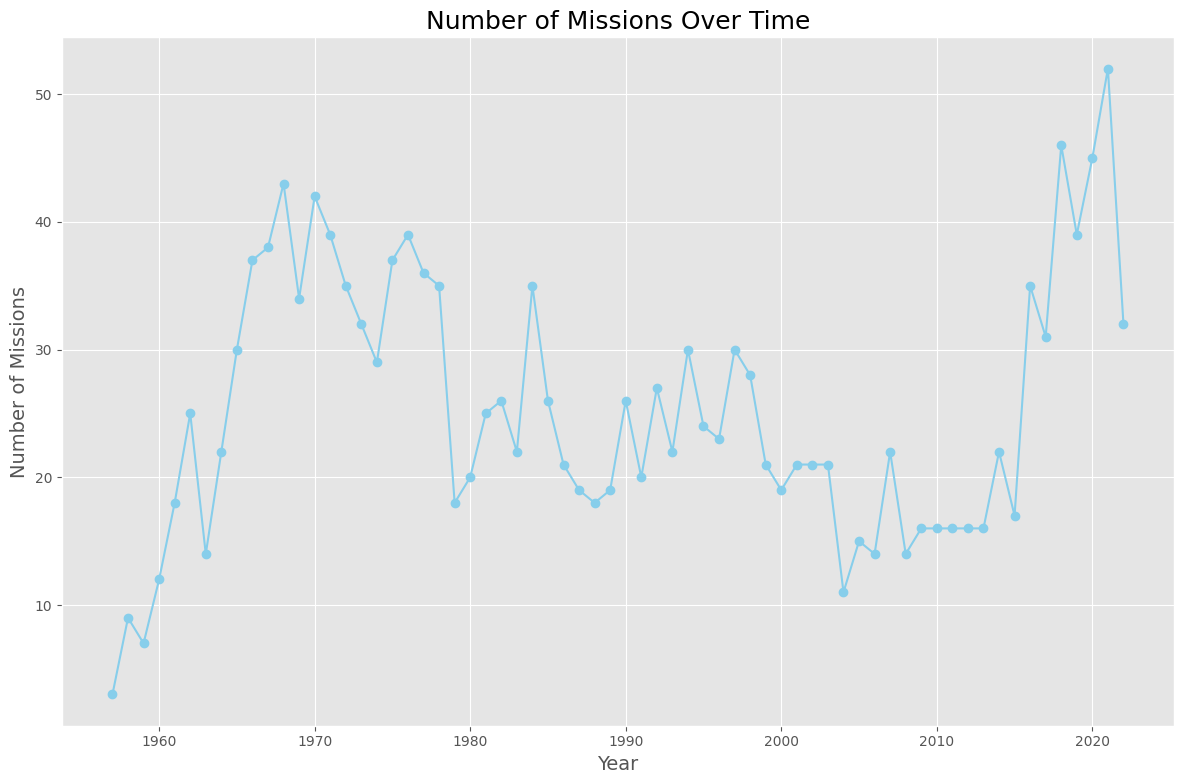

In [ ]:
missions_per_year = space_missions_df.groupby(space_missions_df['Date'].dt.year).size()

plt.figure(figsize=(12, 8))
missions_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title("Number of Missions Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Missions", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 13: Mission Success Rate Over Time (Line Plot)

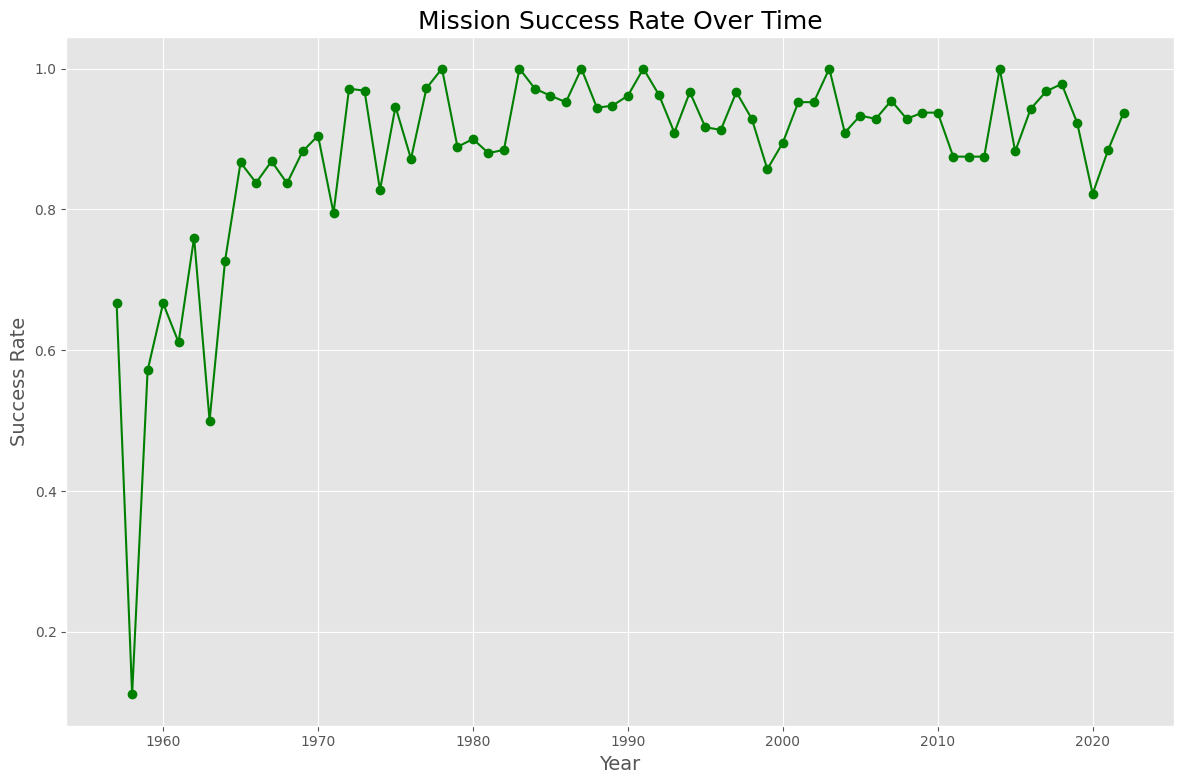

In [ ]:
mission_success_over_time = space_missions_df.groupby(
    [space_missions_df['Date'].dt.year, 'MissionStatus']
).size().unstack(fill_value=0)

mission_success_over_time['Success Rate'] = (
    mission_success_over_time['Success'] / mission_success_over_time.sum(axis=1)
)

plt.figure(figsize=(12, 8))
mission_success_over_time['Success Rate'].plot(kind='line', marker='o', color='green')
plt.title("Mission Success Rate Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 14: Rocket Retirement Trends (Bar Plot)

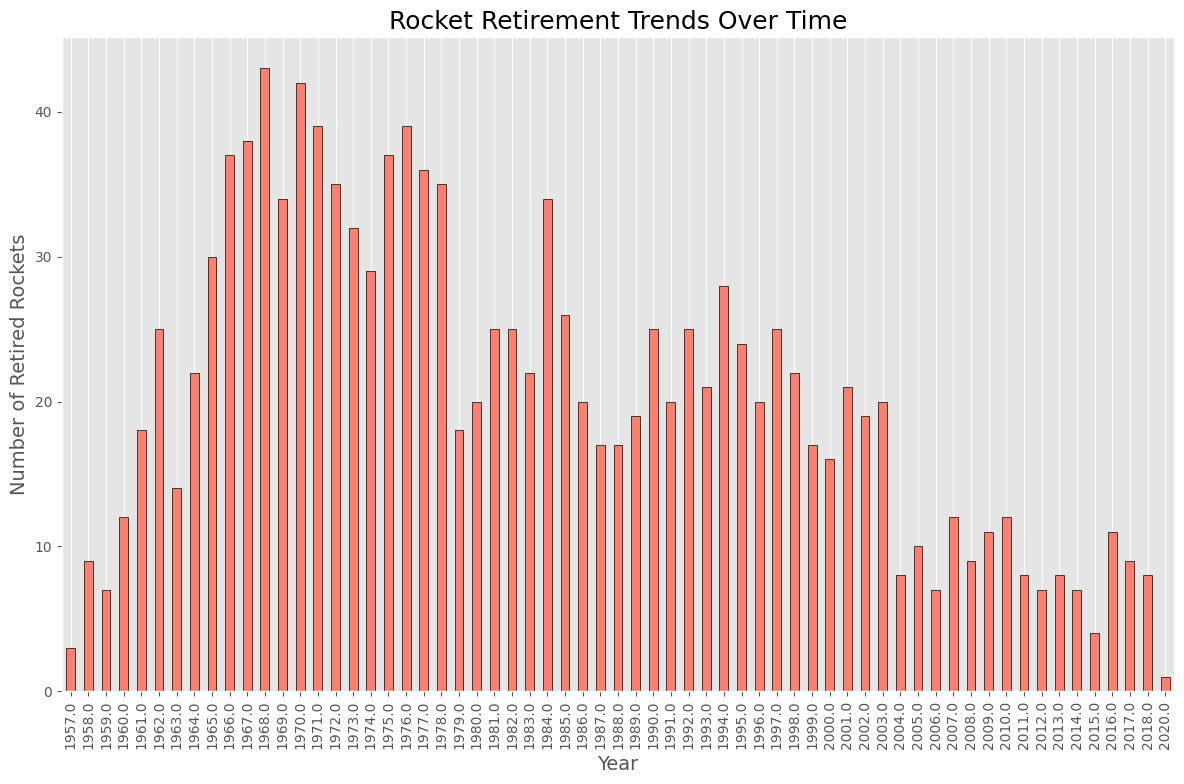

In [ ]:
retired_rockets = space_missions_df[space_missions_df['RocketStatus'] == 'Retired']
retired_per_year = retired_rockets.groupby(retired_rockets['Date'].dt.year).size()

plt.figure(figsize=(12, 8))
retired_per_year.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Rocket Retirement Trends Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Retired Rockets", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualization 15: Mission Status by Company (Stacked Bar Chart)

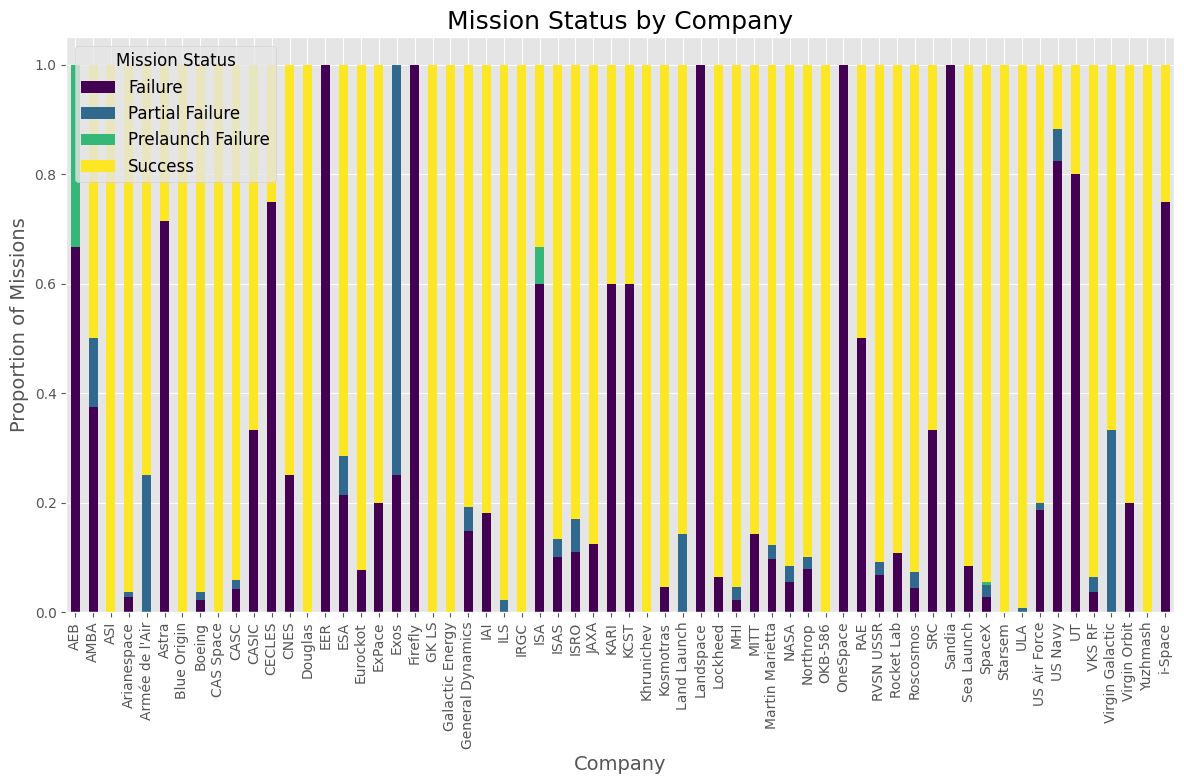

In [ ]:
mission_status_by_company = space_missions_df.groupby(['Company', 'MissionStatus']).size().unstack(fill_value=0)

mission_status_percentage = mission_status_by_company.div(mission_status_by_company.sum(axis=1), axis=0)

mission_status_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title("Mission Status by Company", fontsize=18)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Proportion of Missions", fontsize=14)
plt.legend(title="Mission Status")
plt.tight_layout()
plt.show()

# Visualization 16: Top 10 Most Used Rockets (Bar Plot)

<ipython-input-21-d503f3dd3be0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




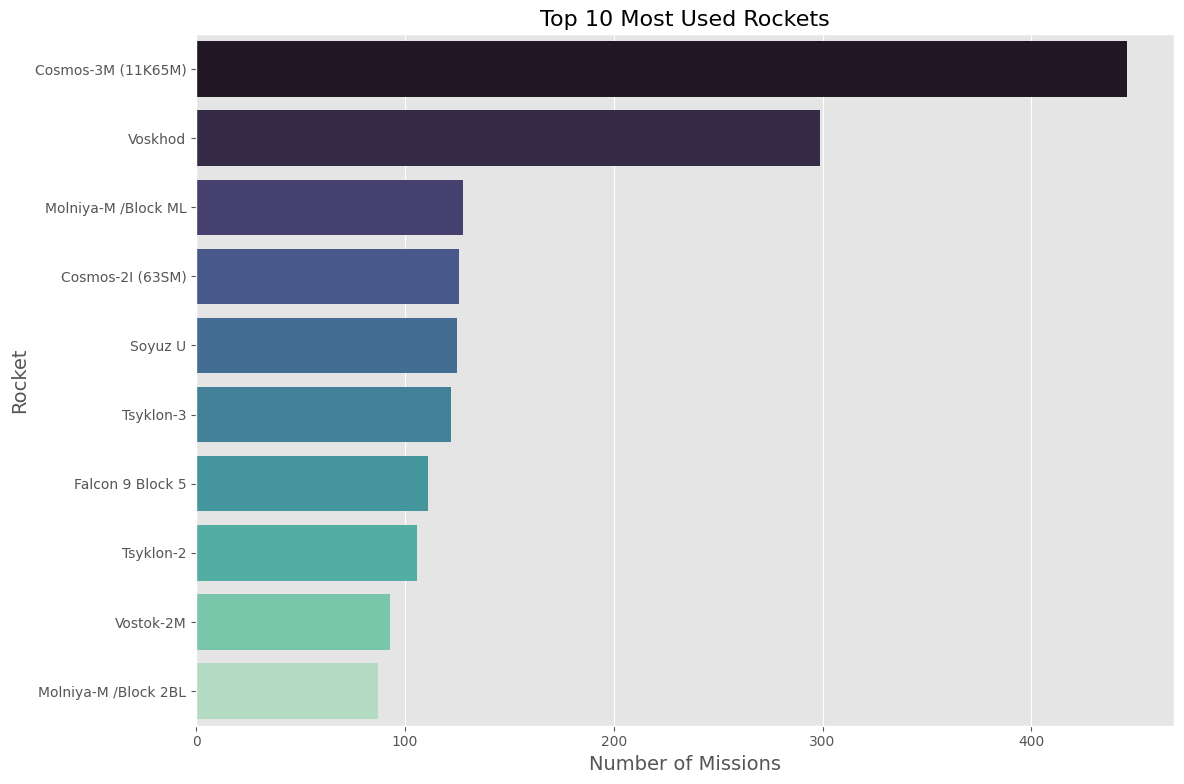

In [ ]:
rocket_usage = space_missions_df['Rocket'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=rocket_usage.index, x=rocket_usage.values, palette="mako")
plt.title("Top 10 Most Used Rockets", fontsize=16)
plt.xlabel("Number of Missions", fontsize=14)
plt.ylabel("Rocket", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 17: Mission Price Distribution (Histogram with KDE)

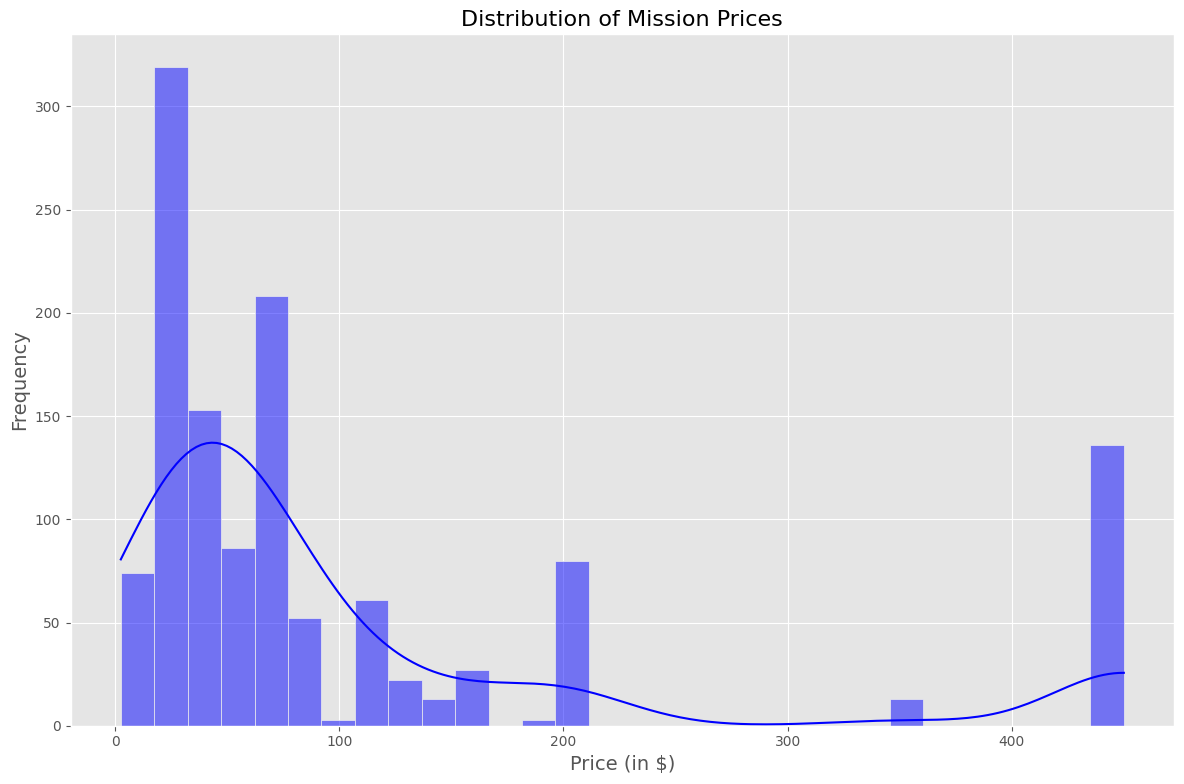

In [ ]:
valid_prices = space_missions_df.dropna(subset=['Price'])

plt.figure(figsize=(12, 8))
sns.histplot(valid_prices['Price'], kde=True, color="blue", bins=30)
plt.title("Distribution of Mission Prices", fontsize=16)
plt.xlabel("Price (in $)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 18: World Map of Mission Counts (Choropleth Map)

In [ ]:
country_mission_counts = space_missions_df['Country'].value_counts().reset_index()
country_mission_counts.columns = ['Country', 'MissionCount']

fig = px.choropleth(
    country_mission_counts,
    locations="Country",
    locationmode="country names",
    color="MissionCount",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="World Map of Mission Counts",
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    title_font=dict(size=24),
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 19: State-wise Mission Distribution in the USA (Bar Plot)

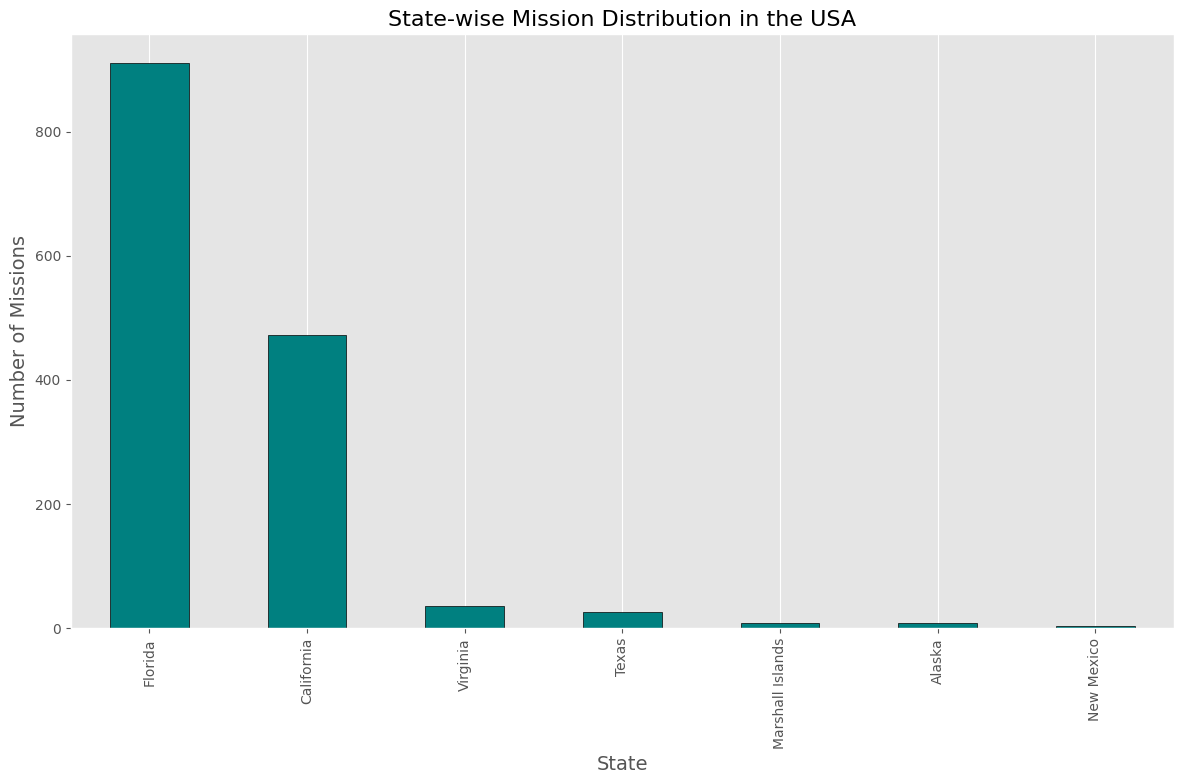

In [ ]:
usa_states = space_missions_df[space_missions_df['Country'] == 'USA']
state_mission_counts = usa_states['State'].value_counts()

plt.figure(figsize=(12, 8))
state_mission_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title("State-wise Mission Distribution in the USA", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Missions", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualization 20: Company vs. Mission Status (Sunburst Chart)

In [ ]:
fig = px.sunburst(
    space_missions_df,
    path=['Company', 'MissionStatus'],
    values=None,
    color="MissionStatus",
    title="Company vs. Mission Status",
    color_discrete_map={
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "orange"
    }
)
fig.update_layout(title_font=dict(size=24), width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size)
)
fig.show()

# Visualization 21: Average Mission Cost Over Time (Line Plot)

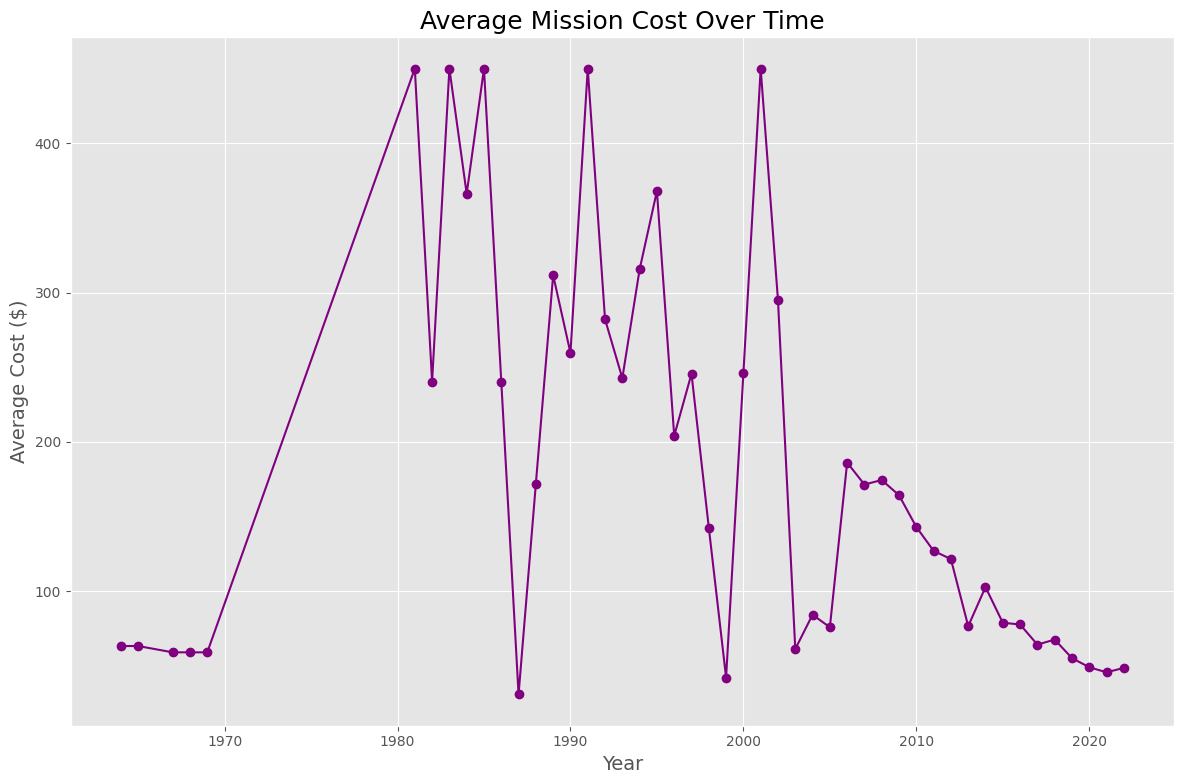

In [ ]:
missions_with_prices = space_missions_df.dropna(subset=['Price'])
price_over_time = missions_with_prices.groupby(missions_with_prices['Date'].dt.year)['Price'].mean()

plt.figure(figsize=(12, 8))
price_over_time.plot(kind='line', marker='o', color='purple')
plt.title("Average Mission Cost Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Cost ($)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 22: Mission Cost vs. Success (Scatter Plot)

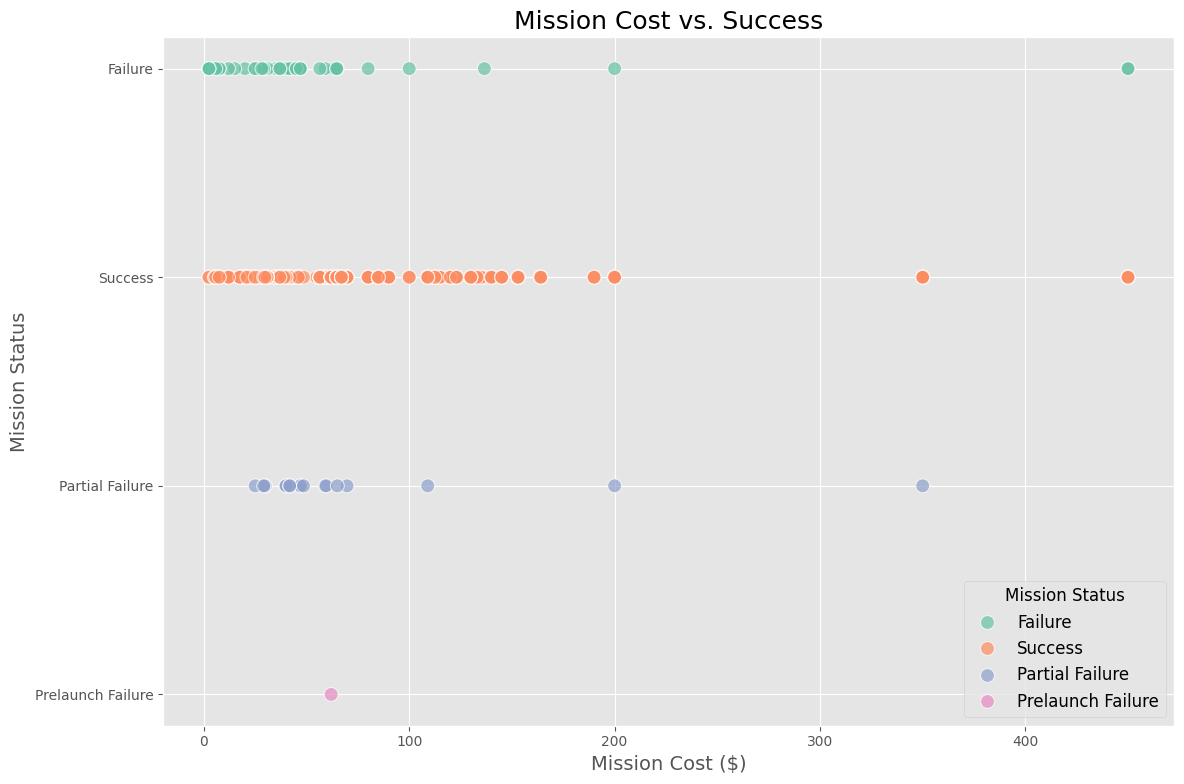

In [ ]:
unique_statuses = missions_with_prices['MissionStatus'].unique()
palette = dict(zip(unique_statuses, sns.color_palette('Set2', len(unique_statuses))))

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=missions_with_prices,
    x='Price',
    y='MissionStatus',
    hue='MissionStatus',
    palette=palette,
    s=100,
    alpha=0.7
)
plt.title("Mission Cost vs. Success", fontsize=18)
plt.xlabel("Mission Cost ($)", fontsize=14)
plt.ylabel("Mission Status", fontsize=14)
plt.legend(title="Mission Status", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 23: Year-wise Success and Failure Trends by Country

<Figure size 1200x800 with 0 Axes>

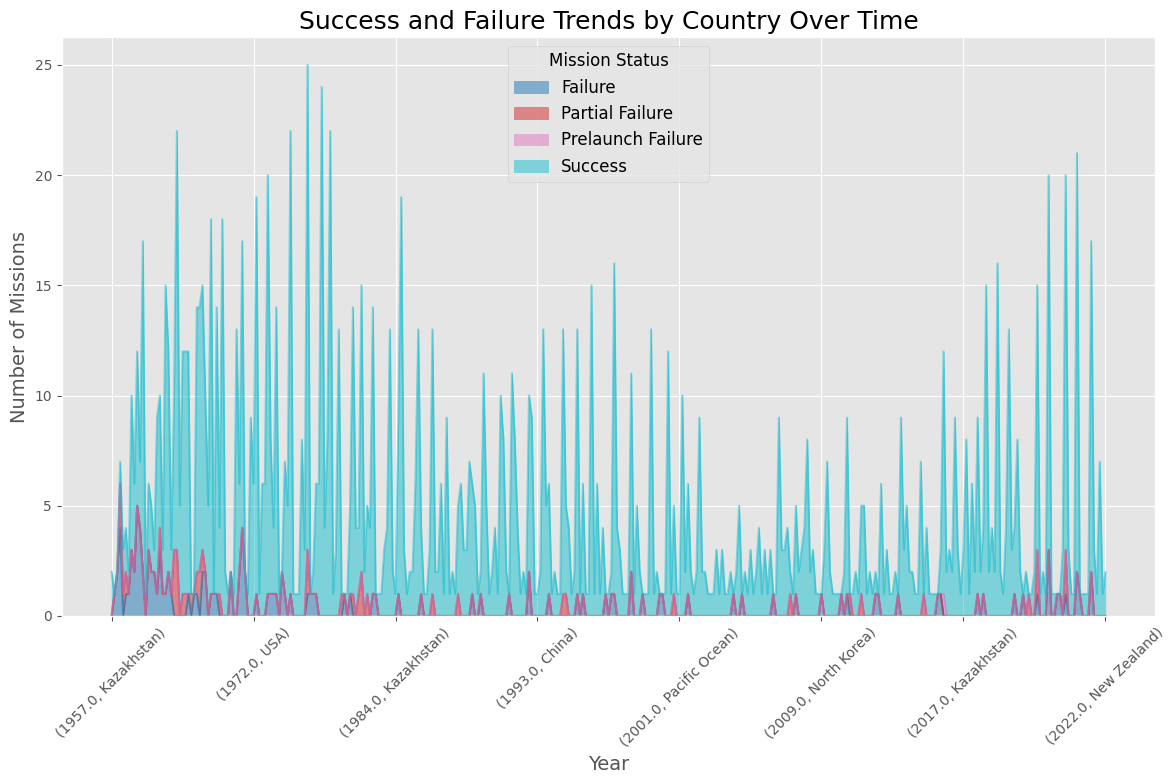

In [ ]:
# Compute success and failure trends
success_failure_trends = space_missions_df.groupby(
    [space_missions_df['Date'].dt.year, 'Country', 'MissionStatus']
).size().unstack(fill_value=0)

# Initialize a new figure with the desired size
plt.figure(figsize=(12, 8))  # Explicitly set figure size

# Plot the area chart with the specified DataFrame
success_failure_trends.plot(
    kind='area',
    stacked=True,
    alpha=0.50,
    colormap="tab10",
    figsize=(12, 8)  # Ensure the plot size matches
)

# Add titles and labels
plt.title("Success and Failure Trends by Country Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Missions", fontsize=14)

# Customize tick labels
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Mission Status", fontsize=12)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

# Visualization 24: Interactive Mission Cost Comparison

In [ ]:
fig = px.box(
    space_missions_df.dropna(subset=['Price']),
    x='Country',
    y='Price',
    color='Country',
    points="all",
    title="Interactive Mission Cost Comparison by Country",
    labels={"Price": "Mission Cost ($)", "Country": "Country"}
)
fig.update_layout(title_font=dict(size=20), paper_bgcolor="#f9f9f9", width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
                  )
fig.show()

# Visualization 25: Success Rates for Rocket Models

<ipython-input-30-275df4331a58>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




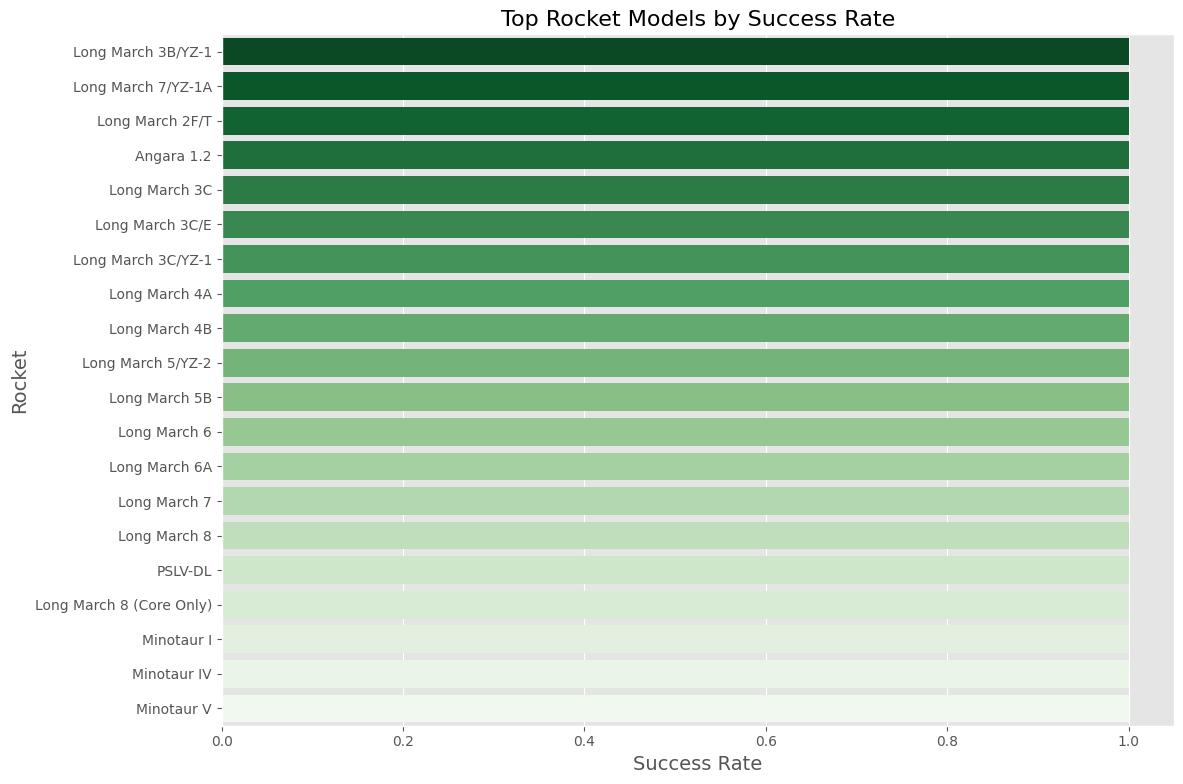

In [ ]:
rocket_success_rate = space_missions_df.groupby(['Rocket', 'MissionStatus']).size().unstack(fill_value=0)
rocket_success_rate['Success Rate'] = rocket_success_rate['Success'] / rocket_success_rate.sum(axis=1)

top_rockets = rocket_success_rate.sort_values('Success Rate', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(
    y=top_rockets.index,
    x=top_rockets['Success Rate'],
    palette="Greens_r"
)
plt.title("Top Rocket Models by Success Rate", fontsize=16)
plt.xlabel("Success Rate", fontsize=14)
plt.ylabel("Rocket", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 26: Most Active Companies Over Time

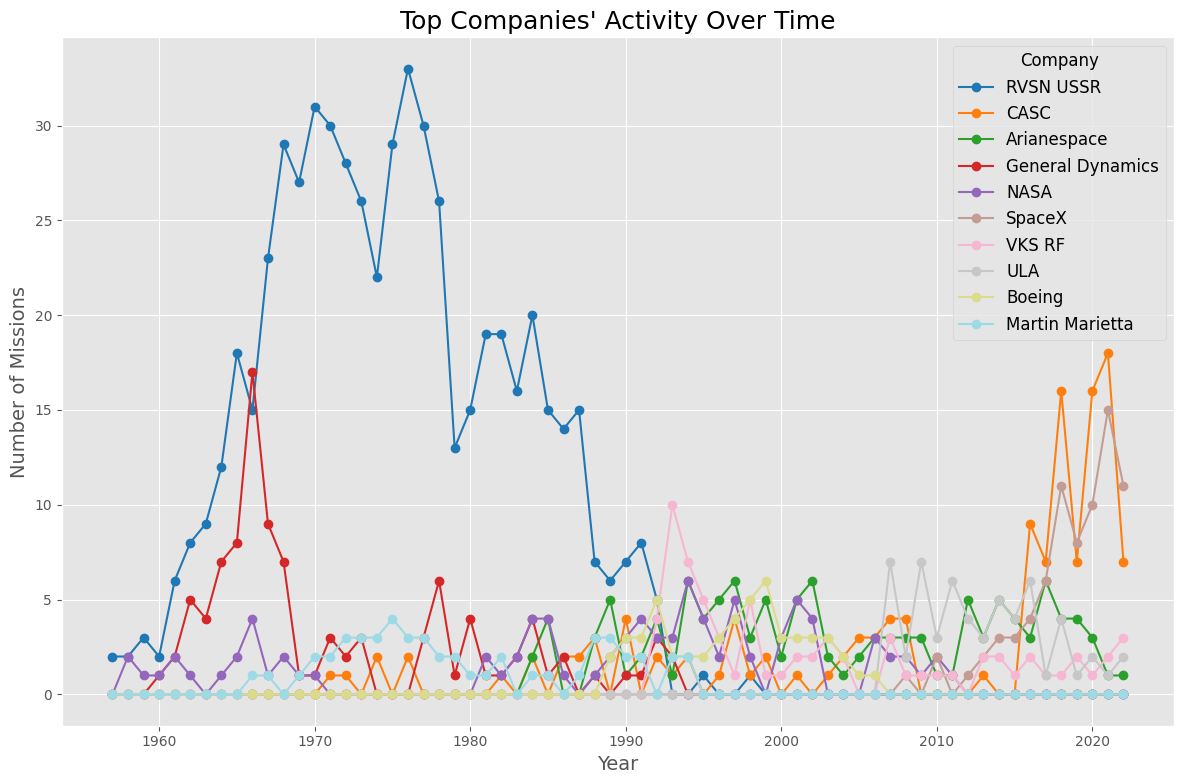

In [ ]:
company_activity = space_missions_df.groupby([space_missions_df['Date'].dt.year, 'Company']).size().unstack(fill_value=0)
company_activity = company_activity.loc[:, company_activity.sum(axis=0).sort_values(ascending=False).head(10).index]

company_activity.plot(kind='line', figsize=(12, 8), marker='o', colormap='tab20')
plt.title("Top Companies' Activity Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Missions", fontsize=14)
plt.legend(title="Company")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 27: Failure Analysis by Rocket Model

<ipython-input-32-90efeb1c3ae0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




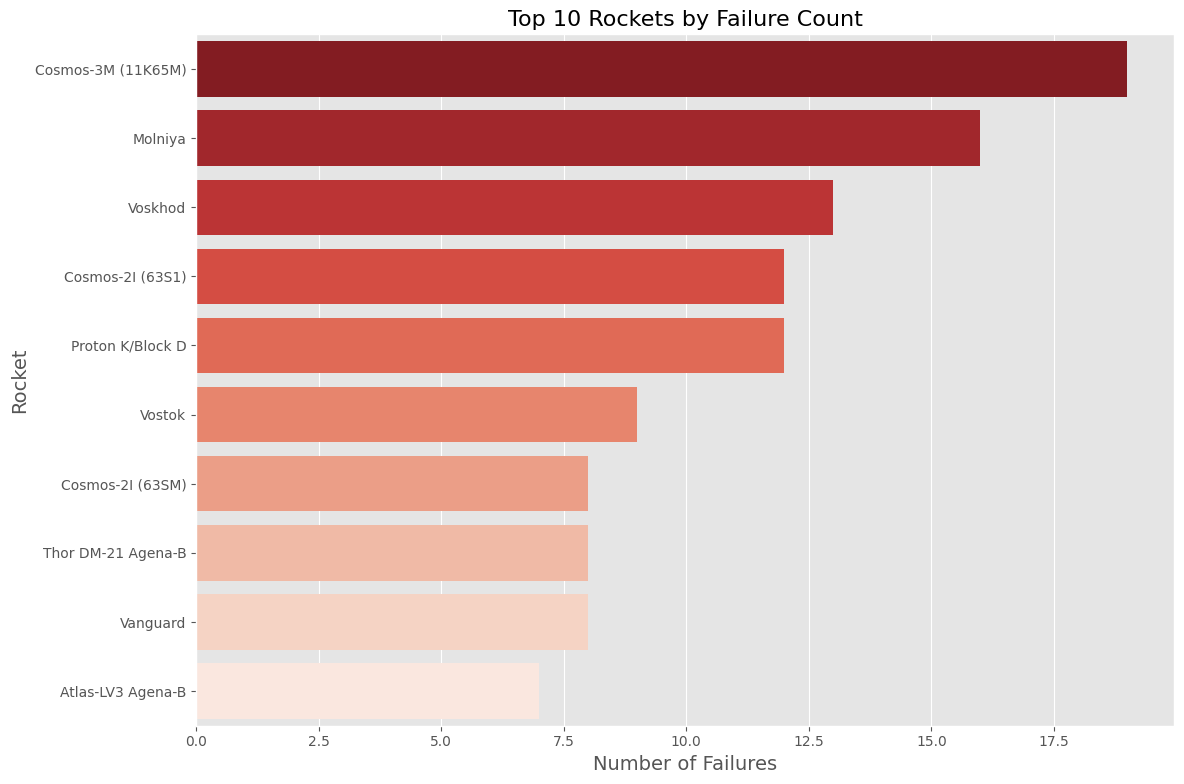

In [ ]:
rocket_failures = space_missions_df[space_missions_df['MissionStatus'] == 'Failure']['Rocket'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(
    y=rocket_failures.index[:10],
    x=rocket_failures.values[:10],
    palette="Reds_r"
)
plt.title("Top 10 Rockets by Failure Count", fontsize=16)
plt.xlabel("Number of Failures", fontsize=14)
plt.ylabel("Rocket", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 28: Mission Costs vs. Success Rates

In [ ]:
mission_costs_success = space_missions_df.dropna(subset=['Price']).groupby(
    ['Company', 'MissionStatus']
).agg({"Price": "mean"}).reset_index()

fig = px.scatter(
    mission_costs_success,
    x="Price",
    y="MissionStatus",
    size="Price",
    color="Company",
    title="Mission Costs vs. Success Rates by Company",
    labels={"Price": "Average Cost ($)", "MissionStatus": "Mission Status"},
)
fig.update_layout(title_font=dict(size=20), paper_bgcolor="#f4f4f4", width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
                  )
fig.show()

# Visualization 29: Launch Timing Analysis

<ipython-input-34-4cb97e77e03c>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



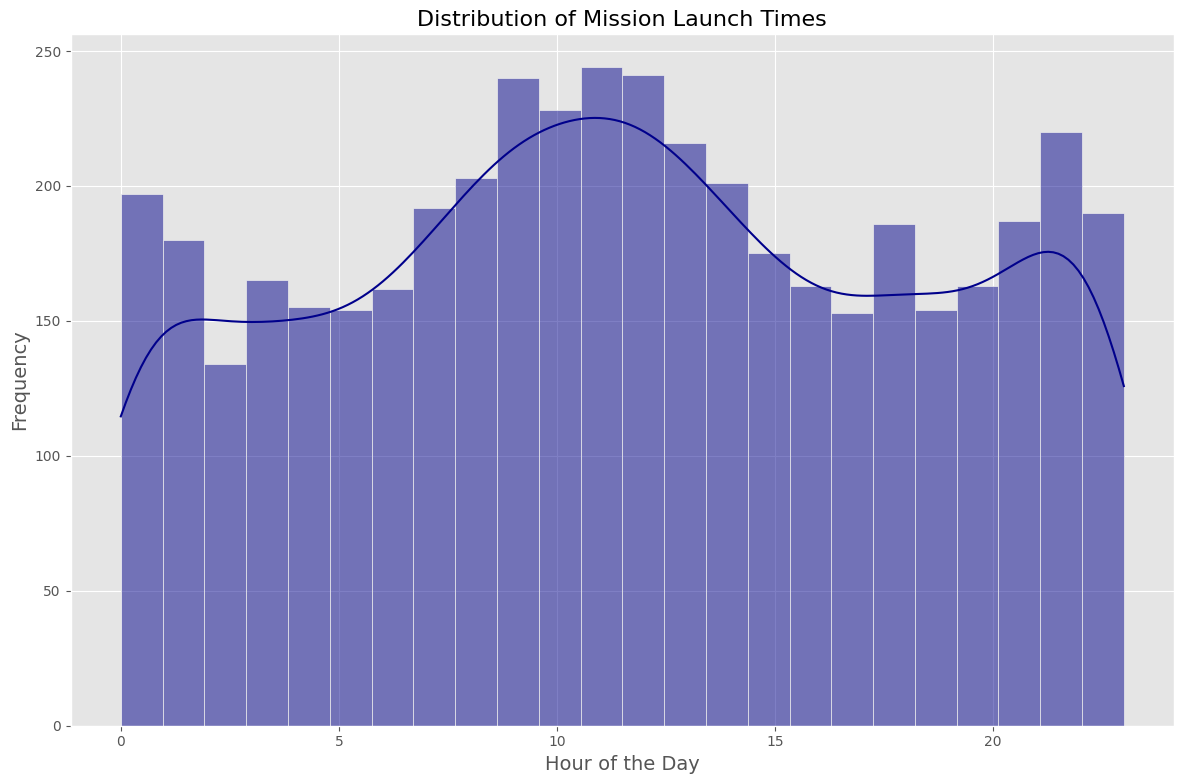

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(
    pd.to_datetime(space_missions_df['Time'], errors='coerce').dt.hour.dropna(),
    bins=24, kde=True, color='darkblue'
)
plt.title("Distribution of Mission Launch Times", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 30: Analysis of Countries other than USA

<ipython-input-35-3c55aafa0da1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




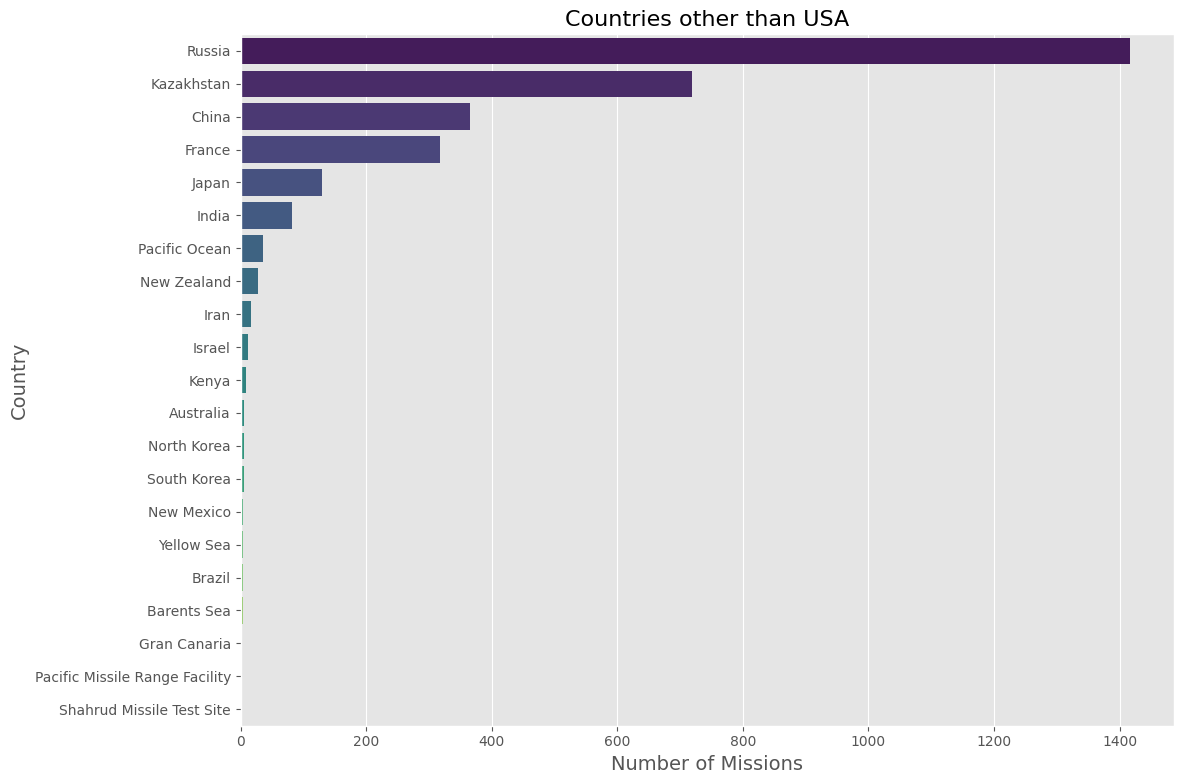

In [ ]:
unknown_states = space_missions_df[space_missions_df['State'] == 'Unknown']['Country'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(
    x=unknown_states.values,
    y=unknown_states.index,
    palette="viridis"
)
plt.title("Countries other than USA", fontsize=16)
plt.xlabel("Number of Missions", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 31: Top Countries by Total Spending

<ipython-input-36-9cccc9e8d820>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




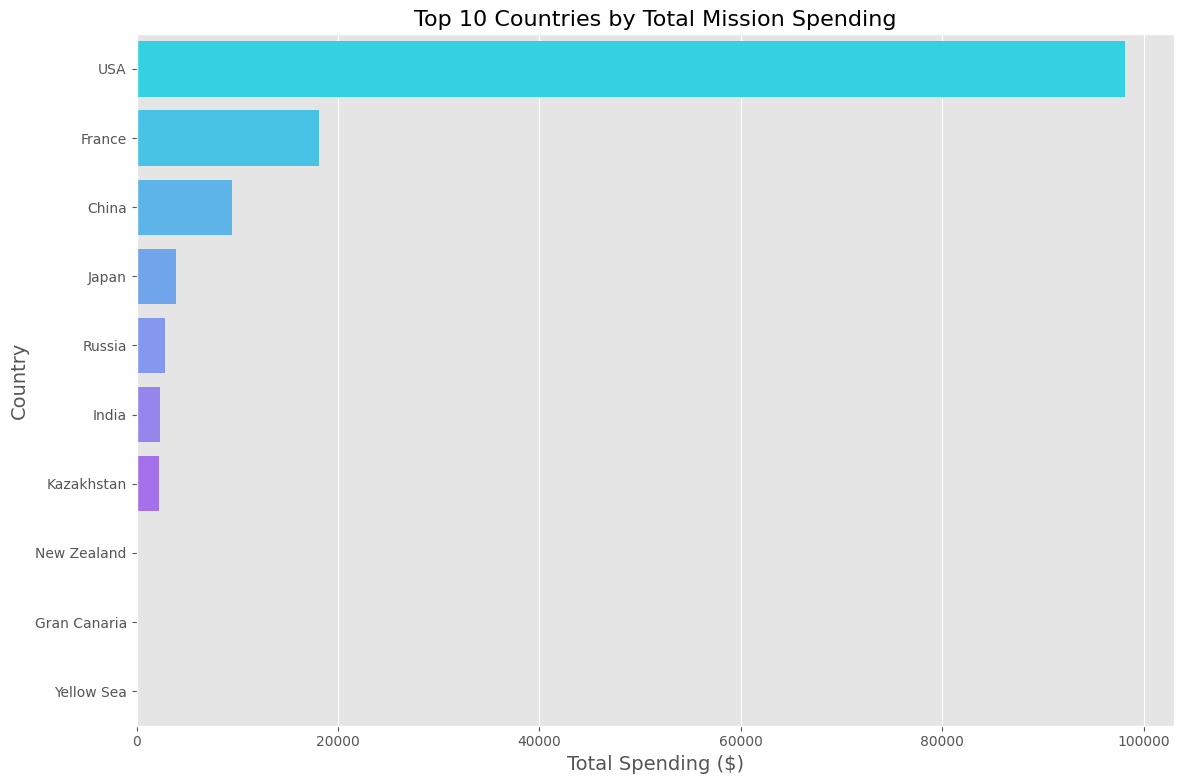

In [ ]:
country_spending = space_missions_df.dropna(subset=['Price']).groupby('Country')['Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    y=country_spending.index[:10],
    x=country_spending.values[:10],
    palette="cool"
)
plt.title("Top 10 Countries by Total Mission Spending", fontsize=16)
plt.xlabel("Total Spending ($)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 32: Mission Costs vs. Success Rates by Company (Bubble Chart)

<ipython-input-37-22a779ec6019>:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



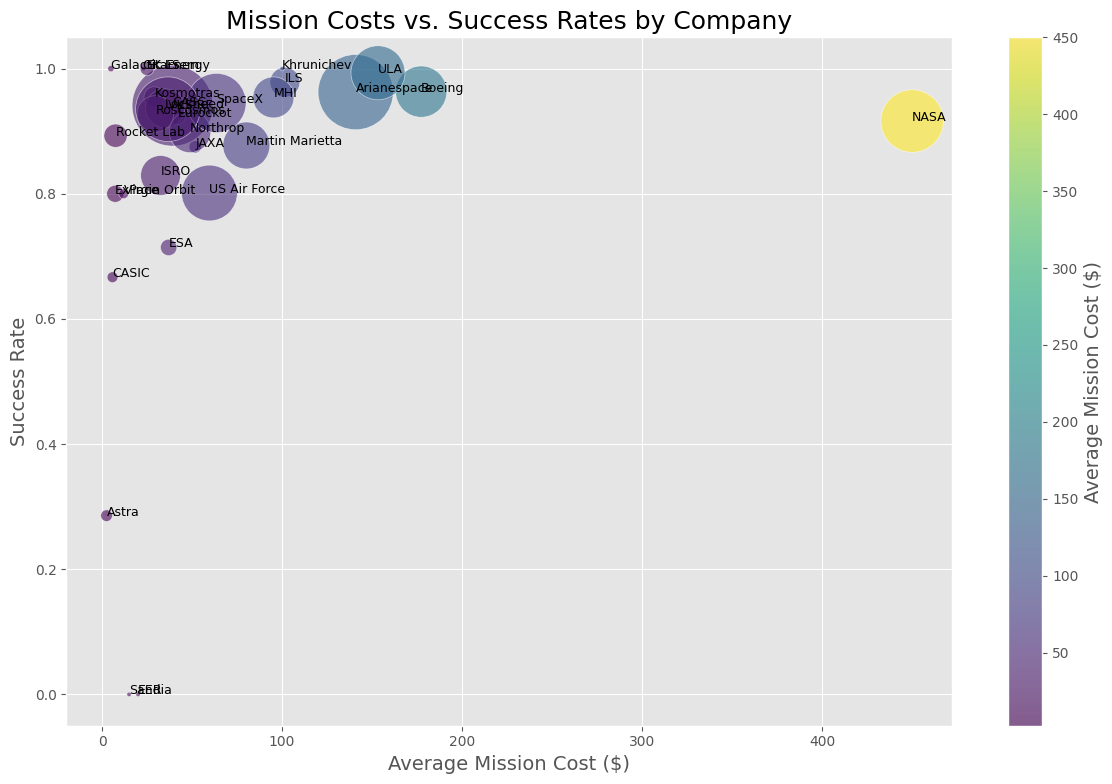

In [ ]:
company_stats = space_missions_df.groupby('Company').agg(
    total_missions=('MissionStatus', 'size'),
    successful_missions=('MissionStatus', lambda x: (x == 'Success').sum()),
    average_cost=('Price', 'mean')
).dropna()

company_stats['success_rate'] = company_stats['successful_missions'] / company_stats['total_missions']

plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x=company_stats['average_cost'],
    y=company_stats['success_rate'],
    s=company_stats['total_missions'] * 10,  # Bubble size
    alpha=0.6,
    c=company_stats['average_cost'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.title('Mission Costs vs. Success Rates by Company', fontsize=18)
plt.xlabel('Average Mission Cost ($)', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.colorbar(bubble, label='Average Mission Cost ($)')
for i, txt in enumerate(company_stats.index):
    plt.annotate(txt, (company_stats['average_cost'][i], company_stats['success_rate'][i]), fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 33: Heat Map of Mission Density Over Time

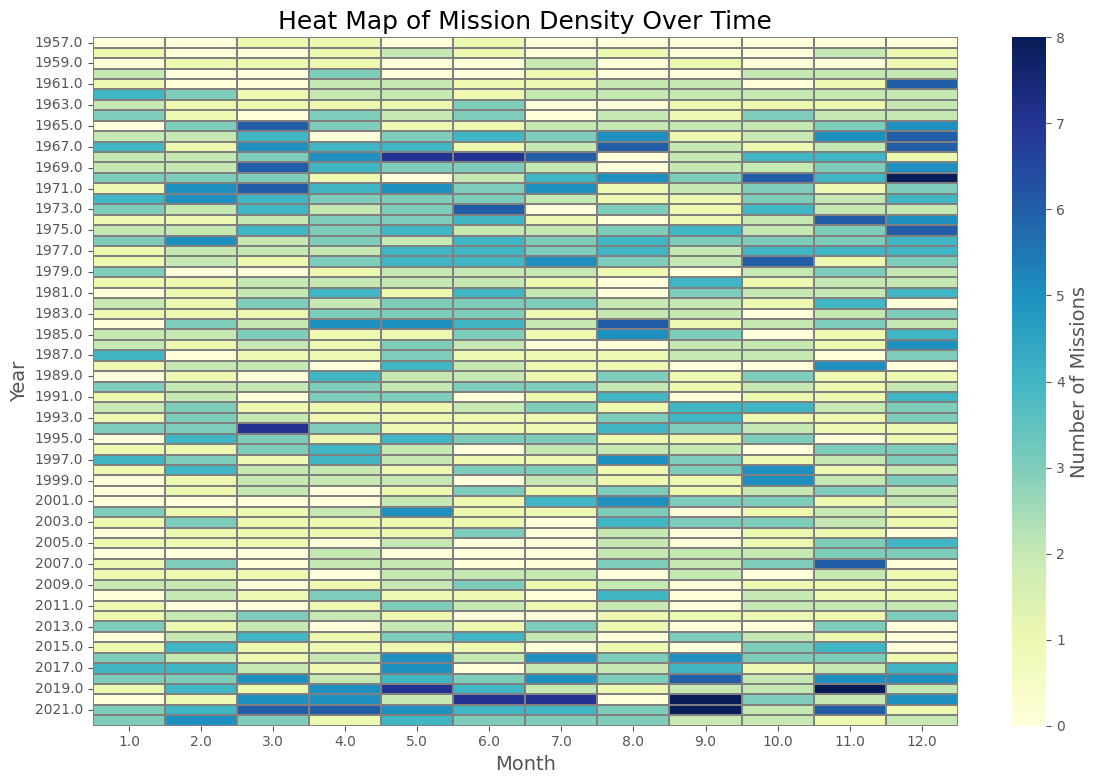

In [ ]:
# Extract Year and Month from the Date column
space_missions_df['Year'] = space_missions_df['Date'].dt.year
space_missions_df['Month'] = space_missions_df['Date'].dt.month

# Create the pivot table for the heatmap
heatmap_data = space_missions_df.pivot_table(
    index='Year',
    columns='Month',
    values='Mission',
    aggfunc='count',
    fill_value=0
)

# Set the figure size explicitly
plt.figure(figsize=(12, 8))  # Set the desired figure size

# Update font sizes
plt.rcParams.update({
    'font.size': 12,  # General font size
    'axes.titlesize': 18,  # Title font size
    'axes.labelsize': 14,  # Axis label font size
    'xtick.labelsize': 10,  # X-axis tick label font size
    'ytick.labelsize': 10   # Y-axis tick label font size
})

# Plot the heatmap
ax = sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.1,
    linecolor='gray',
    cbar_kws={'label': 'Number of Missions'}
)

# Set aspect ratio explicitly
ax.set_aspect(aspect='auto', adjustable='box')

# Add title and labels
plt.title('Heat Map of Mission Density Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Adjust layout to ensure all elements fit
plt.tight_layout()

# Display the plot
plt.show()

# Visualization 34: Top Launch Locations (Bar Plot as Proxy for Heatmap)

<ipython-input-39-84931754b01f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




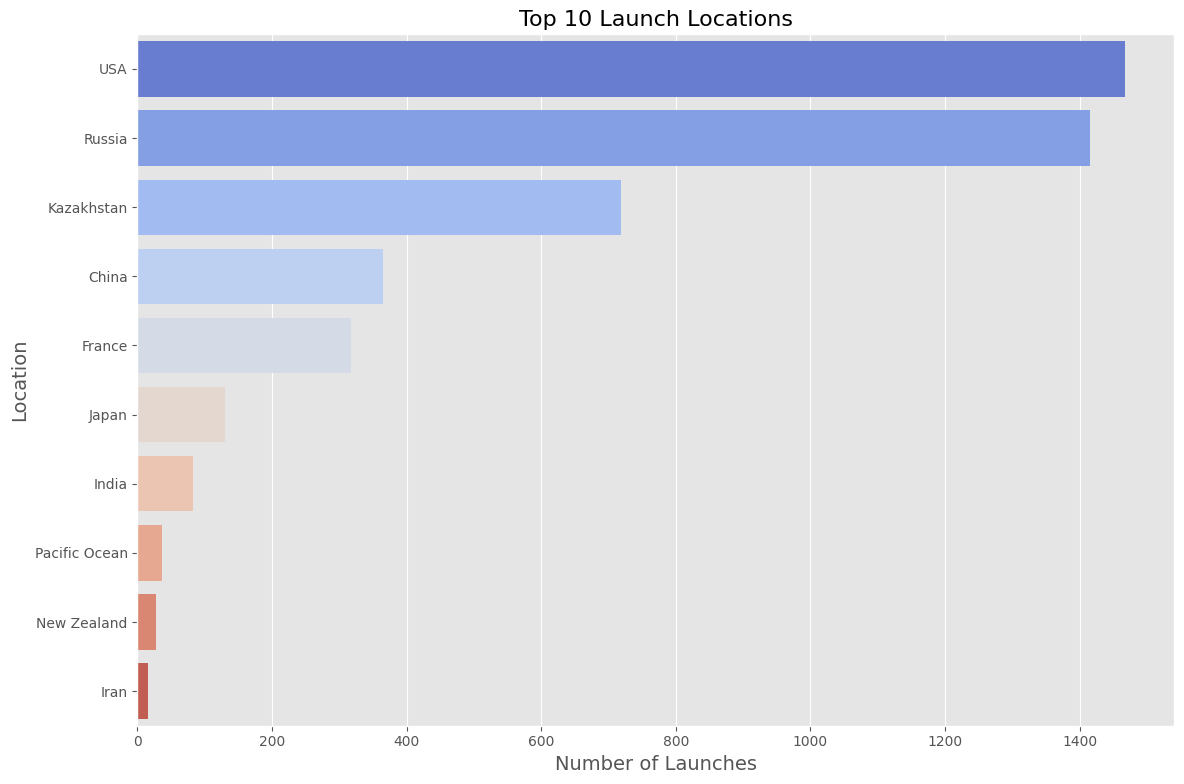

In [ ]:
space_missions_df['Coordinates'] = space_missions_df['Location'].apply(lambda x: (x.split(',')[-1].strip()))

launch_counts = space_missions_df['Coordinates'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=launch_counts.index[:10], x=launch_counts.values[:10], palette="coolwarm")
plt.title("Top 10 Launch Locations", fontsize=16)
plt.xlabel("Number of Launches", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 35: Number of Space Missions Over Time (Interactive Line Plot)

In [ ]:
missions_per_year = space_missions_df.groupby('Year').size().reset_index(name='Mission Count')

fig = px.line(
    missions_per_year,
    x="Year",
    y="Mission Count",
    title="Number of Space Missions Over Time",
    labels={"Year": "Year", "Mission Count": "Number of Missions"}
)
fig.update_traces(line=dict(color='blue', width=3))
fig.update_layout(
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 36: Mission Success Rates by Country and Company (Sunburst Chart)

In [ ]:
fig = px.sunburst(
    space_missions_df,
    path=['Country', 'Company', 'MissionStatus'],
    title="Mission Success Rates by Country and Company",
    color="MissionStatus",
    color_discrete_map={
        "Success": "green",
        "Failure": "red",
        "Partial Failure": "orange"
    }
)
fig.update_layout(title_font=dict(size=24), width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 37: Alluvial Chart for Country, Company, and Mission Status

In [ ]:
alluvial_data = space_missions_df[['Country', 'Company', 'MissionStatus']].dropna()

status_color_map = {
    'Success': 1,
    'Failure': 0,
    'Partial Failure': 0.5,
    'Prelaunch Failure': 0.25
}

fig = px.parallel_categories(
    alluvial_data,
    dimensions=['Country', 'Company', 'MissionStatus'],
    color=alluvial_data['MissionStatus'].map(status_color_map),
    color_continuous_scale=['#0072B2', '#D55E00', '#F0E442', '#CC79A7'],
    labels={
        'Country': 'Country of Origin',
        'Company': 'Company Name',
        'MissionStatus': 'Mission Outcome'
    },
    title="Alluvial Chart: Relationships Between Country, Company, and Mission Status"
)

fig.update_layout(
    title_font_size=24,
    font=dict(size=12),
    paper_bgcolor="#ffffff",
    plot_bgcolor="#f4f4f4",
    margin=dict(l=150, r=150, t=150, b=150),
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 38: Radar Chart for Metrics Across Countries

In [ ]:
radar_data = space_missions_df.groupby('Country').agg(
    total_missions=('MissionStatus', 'count'),
    success_rate=('MissionStatus', lambda x: (x == 'Success').sum() / x.size),
    average_cost=('Price', 'mean')
).dropna()

radar_data_normalized = radar_data.copy()
radar_data_normalized['total_missions'] = radar_data['total_missions'] / radar_data['total_missions'].max()
radar_data_normalized['success_rate'] = radar_data['success_rate'] / radar_data['success_rate'].max()
radar_data_normalized['average_cost'] = radar_data['average_cost'] / radar_data['average_cost'].max()

radar_data_normalized.reset_index(inplace=True)

countries_to_plot = radar_data_normalized.head(5)
melted_data = countries_to_plot.melt(
    id_vars='Country',
    var_name='Metric',
    value_name='Value'
)

fig = px.line_polar(
    melted_data,
    r='Value',
    theta='Metric',
    color='Country',
    line_close=True,
    title='Radar Chart: Comparison of Metrics Across Countries',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    font=dict(size=12),
    title_font_size=20,
    showlegend=True,
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 39: Distribution of Mission Costs (Histogram)

In [ ]:
valid_prices = space_missions_df.dropna(subset=['Price'])

fig = px.histogram(
    valid_prices,
    x='Price',
    nbins=30,
    color_discrete_sequence=['#0072B2'],
    title="Distribution of Mission Costs",
    labels={"Price": "Mission Cost ($)"},
)

fig.update_traces(marker=dict(line=dict(width=1, color='black')), opacity=0.7)
fig.add_traces(px.density_contour(valid_prices, x="Price").data)

fig.update_layout(
    title_font_size=20,
    xaxis=dict(title="Mission Cost ($)"),
    yaxis=dict(title="Frequency"),
    paper_bgcolor="#ffffff",
    plot_bgcolor="#f4f4f4",
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 40: Distribution of Missions Across Countries

In [ ]:
fig = px.histogram(
    space_missions_df,
    x='Country',
    color_discrete_sequence=['#F0E442'],
    title="Distribution of Missions Across Countries",
    labels={"Country": "Country"},
)

fig.update_layout(
    title_font_size=20,
    xaxis=dict(title="Country"),
    yaxis=dict(title="Number of Missions"),
    paper_bgcolor="#ffffff",
    plot_bgcolor="#f4f4f4",
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 41: Distribution of Mission Success Rates by Country

In [ ]:
success_rate_data = space_missions_df.groupby('Country').agg(
    success_rate=('MissionStatus', lambda x: (x == 'Success').sum() / x.size)
).reset_index()

fig = px.histogram(
    success_rate_data,
    x='success_rate',
    nbins=20,
    color_discrete_sequence=['#D55E00'],
    title="Distribution of Mission Success Rates by Country",
    labels={"success_rate": "Success Rate"},
)

fig.update_layout(
    title_font_size=20,
    xaxis=dict(title="Success Rate"),
    yaxis=dict(title="Frequency"),
    paper_bgcolor="#ffffff",
    plot_bgcolor="#f4f4f4",
    width=1200,  # Set width to maintain size
    height=800  # Set height to maintain size
)
fig.show()

# Visualization 42: Infographic of Key Metrics

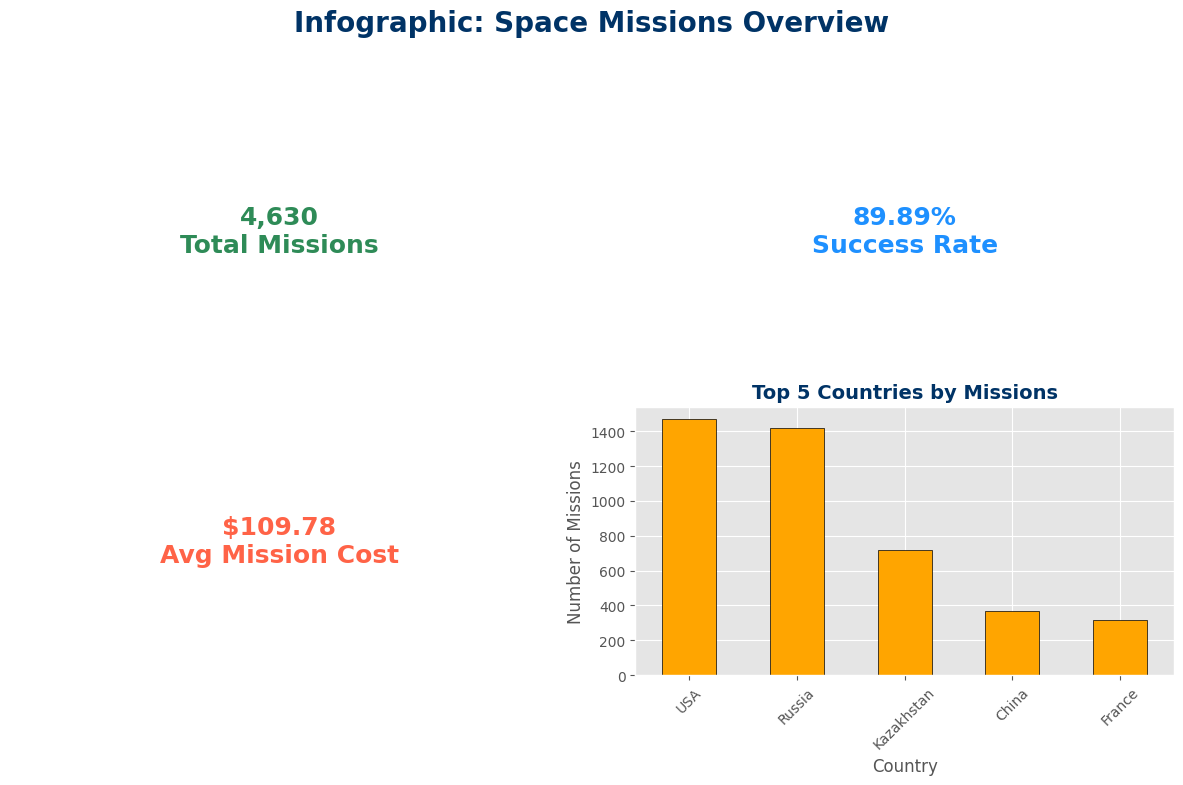

In [ ]:
total_missions = space_missions_df.shape[0]
success_rate = (
    space_missions_df['MissionStatus'].value_counts(normalize=True).get('Success', 0) * 100
)
avg_cost = space_missions_df['Price'].mean()
top_country = space_missions_df['Country'].value_counts().idxmax()
missions_by_country = space_missions_df['Country'].value_counts().head(5)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Infographic: Space Missions Overview", fontsize=20, fontweight="bold", color="#003366")

# Total missions
ax[0, 0].text(0.5, 0.5, f"{total_missions:,}\nTotal Missions",
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, color="#2E8B57", fontweight="bold")
ax[0, 0].axis("off")

# Success rate
ax[0, 1].text(0.5, 0.5, f"{success_rate:.2f}%\nSuccess Rate",
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, color="#1E90FF", fontweight="bold")
ax[0, 1].axis("off")

# Average cost
ax[1, 0].text(0.5, 0.5, f"${avg_cost:,.2f}\nAvg Mission Cost",
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, color="#FF6347", fontweight="bold")
ax[1, 0].axis("off")

# Top countries by missions
missions_by_country.plot(kind="bar", color="#FFA500", edgecolor="black", ax=ax[1, 1])
ax[1, 1].set_title("Top 5 Countries by Missions", fontsize=14, fontweight="bold", color="#003366")
ax[1, 1].set_xlabel("Country", fontsize=12)
ax[1, 1].set_ylabel("Number of Missions", fontsize=12)
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualization 43: Interconnections in Space Missions (Network Graph)

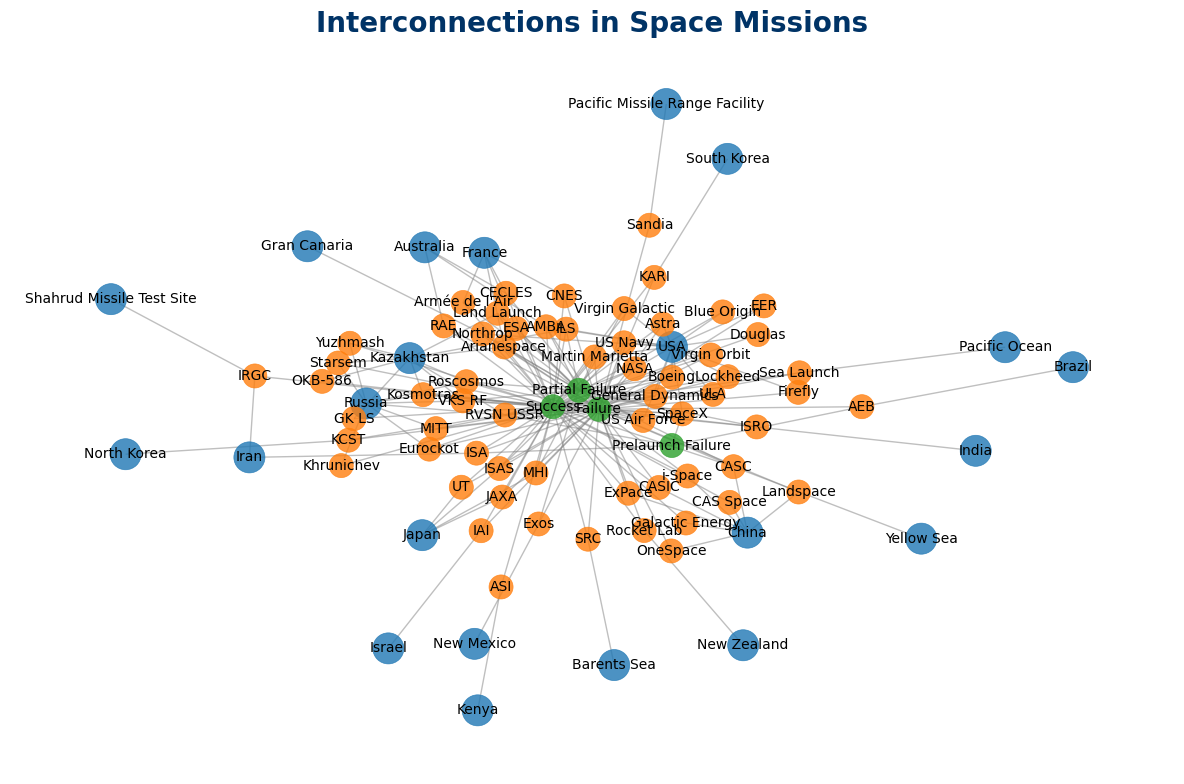

In [ ]:
import networkx as nx

# Filter and prepare relationship data
relationship_data = space_missions_df[['Country', 'Company', 'MissionStatus']].dropna()

# Create graph
G = nx.Graph()
for _, row in relationship_data.iterrows():
    G.add_node(row['Country'], type='Country', color='#1f77b4')
    G.add_node(row['Company'], type='Company', color='#ff7f0e')
    G.add_node(row['MissionStatus'], type='MissionStatus', color='#2ca02c')
    G.add_edge(row['Country'], row['Company'])
    G.add_edge(row['Company'], row['MissionStatus'])

# Define graph layout
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Set node colors and sizes
node_colors = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes]
node_sizes = [500 if G.nodes[node]['type'] == 'Country' else 300 for node in G.nodes]

# Adjust figure size explicitly
plt.figure(figsize=(12, 8))  # Ensure the plot size is 12x8

# Draw graph elements
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Add title and remove axis
plt.title("Interconnections in Space Missions", fontsize=20, fontweight="bold", color="#003366")
plt.axis('off')

# Show plot
plt.tight_layout()  # Ensure elements fit well
plt.show()

# Visualization 44: Top Companies by Mission Failures

<ipython-input-49-9a32c6a959ea>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




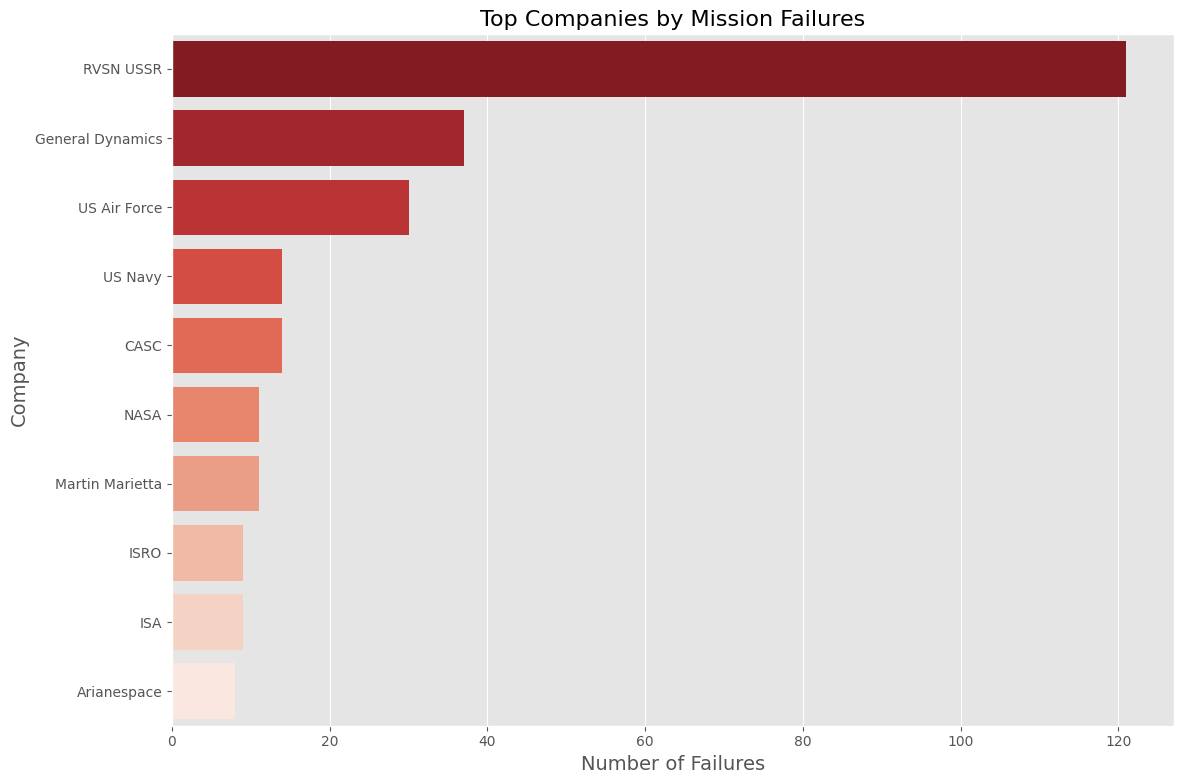

In [ ]:
company_failures = space_missions_df[space_missions_df['MissionStatus'] == 'Failure']['Company'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=company_failures.index, x=company_failures.values, palette="Reds_r")
plt.title("Top Companies by Mission Failures", fontsize=16)
plt.xlabel("Number of Failures", fontsize=14)
plt.ylabel("Company", fontsize=14)
plt.tight_layout()
plt.show()

# Visualization 45: Success Rates by Country (Pie Chart)

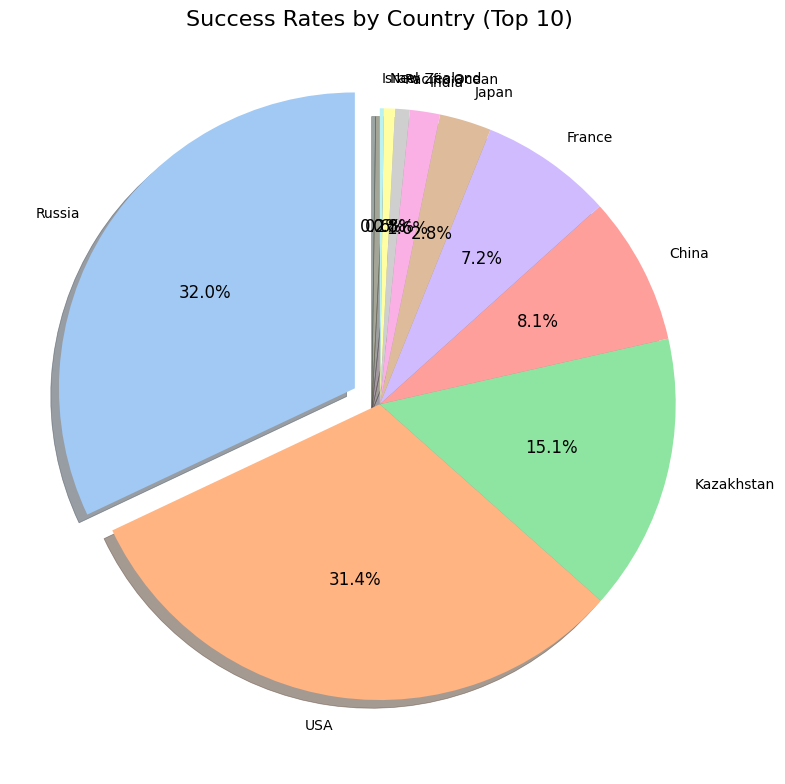

In [ ]:
success_rates = space_missions_df[space_missions_df['MissionStatus'] == 'Success']['Country'].value_counts().head(10)

# Set up the figure with a consistent size
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted to 12x8

# Plot the pie chart
success_rates.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    explode=[0.1 if i == 0 else 0 for i in range(len(success_rates))],  # Highlight the first slice
    shadow=True,
    ax=ax  # Use the subplot to ensure tight control over the layout
)

# Add title and adjust layout
ax.set_title("Success Rates by Country (Top 10)", fontsize=16)
ax.set_ylabel('')  # Remove unnecessary ylabel
ax.set_aspect('equal')  # Ensure the pie chart is circular
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()